# Data Cleaning

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error

import warnings

In [2]:
dfcomments = pd.read_csv("labeled_comments_cleaned.csv")


In [3]:
dfcomments.head()

file_id                            comment_id  \
0  ed88fa24-1a89-44fb-9a66-c7f554d87f5d  ffc97358-69e6-48fb-aaf0-6a844e26f653   
1  0c9c7a44-8bae-4bcf-a271-1b54ab0ef41e  ffa706dc-4877-492d-ac74-598d5f4d07c5   
2  0c9c7a44-8bae-4bcf-a271-1b54ab0ef41e  ffa706dc-4877-492d-ac74-598d5f4d07c5   
3  0c9c7a44-8bae-4bcf-a271-1b54ab0ef41e  ffa706dc-4877-492d-ac74-598d5f4d07c5   
4  f5208894-9572-4cb8-b023-00b3c03cee89  ff533813-4050-424d-8e01-3c8dbb392f4d   

                               comment_date       anonymized_nickname  \
0  2013-04-09 09:30:00+00:00 00:00:00+00:00                    Editor   
1  2011-12-08 15:51:00+00:00 00:00:00+00:00  Alicia R. Dalton-Tingler   
2  2011-12-08 15:51:00+00:00 00:00:00+00:00  Alicia R. Dalton-Tingler   
3  2011-12-08 15:51:00+00:00 00:00:00+00:00  Alicia R. Dalton-Tingler   
4  2016-03-09 15:05:00+00:00 00:00:00+00:00            Alannah Kittle   

                             document_paragraph_text document_selected_text  \
0  The experiments were carried out in a fluidize...                    NaN   
1  In addition to the work mentioned above, the E...                    NaN   
2  In addition to the work mentioned above, the E...                    NaN   
3  In addition to the work mentioned above, the E...                    NaN   
4                                                NaN                    NaN   

   document_selected_sentences  \
0                          1.0   
1                          1.0   
2                          1.0   
3                          1.0   
4                          1.0   

                                   comment_full_text  \
0                                                Ok?   
1  This has been discussed in the Executive Summa...   
2  This has been discussed in the Executive Summa...   
3  This has been discussed in the Executive Summa...   
4    CODING\n\nCode qualitative data for WAVGUAGE03A   

                               comment_sentence_text  is_sentence  ...  \
0                                                Ok?            0  ...   
1  This has been discussed in the Executive Summa...            1  ...   
2    It is, however, very out of place sitting here.            1  ...   
3  This has been discussed in the Executive Summa...            0  ...   
4    CODING\n\nCode qualitative data for WAVGUAGE03A            0  ...   

   spelling_errors  tracked_changes  next_action               level_0  \
0              0.0              2.0         KEEP  INFORMATION EXCHANGE   
1              0.0              1.0         KEEP          MODIFICATION   
2              0.0              1.0         KEEP  SOCIAL COMMUNICATION   
3              0.0              1.0         KEEP          MODIFICATION   
4              0.0              0.0         KEEP  INFORMATION EXCHANGE   

      level_1                  level_2               level_3  level_4  \
0   REQUESTED  REQUESTING_CONFIRMATION      POTENTIAL_CHANGE      NaN   
1   EXECUTION                  PROMISE                   NaN      NaN   
2  DISCUSSION                  CONTENT  NOT_POTENTIAL_CHANGE      NaN   
3   REQUESTED                  CONTENT              EXPLICIT      NaN   
4    PROVIDED                REFERENCE      POTENTIAL_CHANGE      NaN   

   date_column time_column  
0   2013-04-09    09:30:00  
1   2011-12-08    15:51:00  
2   2011-12-08    15:51:00  
3   2011-12-08    15:51:00  
4   2016-03-09    15:05:00  

[5 rows x 33 columns]

In [4]:
dfcomments['file_id'].unique().size


690

In [5]:
column_names = dfcomments.columns.tolist()
columns_comma_separated = ', '.join(column_names)
print(columns_comma_separated)

file_id, comment_id, comment_date, anonymized_nickname, document_paragraph_text, document_selected_text, document_selected_sentences, comment_full_text, comment_sentence_text, is_sentence, num_sentence, total_sentences, grammar_checked, grammatical_errors, has_replies, is_reply, num_reply, num_replies, is_resolved, language_name, num_hyperlinks, num_images, spelling_checked, spelling_errors, tracked_changes, next_action, level_0, level_1, level_2, level_3, level_4, date_column, time_column


In [6]:
import nltk
import re
from nltk import bigrams, trigrams
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

text_data = ' '.join(dfcomments['comment_full_text'])

text_data_cleaned = re.sub(r'[^\w\s]', '', text_data)

tokens = word_tokenize(text_data_cleaned)  # Tokenize the text data

filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
# Generate bigrams
bi_grams = list(trigrams(filtered_tokens))

# Count the occurrences of each bigram
bi_gram_counts = Counter(bi_grams)

# Print the most common bigrams and their counts
for bi_gram, count in bi_gram_counts.most_common(20):
    print(bi_gram, count)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


('Also', 'update', 'indexes') 199
('update', 'indexes', 'table') 199
('indexes', 'table', 'contents') 199
('read', 'across', 'information') 90
('Prefer', 'wireless', 'access') 72
('Work', 'scheduled', 'completed') 64
('estimated', 'cost', 'Project') 62
('cost', 'Project', 'less') 62
('Project', 'less', '100000') 62
('bonding', 'requirements', 'set') 62
('requirements', 'set', 'forth') 62
('set', 'forth', 'Standard') 62
('forth', 'Standard', 'Construction') 62
('Standard', 'Construction', 'Contract') 62
('Construction', 'Contract', 'Documents') 62
('Contract', 'Documents', 'Subsection') 62
('Documents', 'Subsection', '5') 62
('Subsection', '5', 'Requirements') 62
('5', 'Requirements', 'Bid') 62
('Requirements', 'Bid', 'Deposit') 62


# Data Preprocessing

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [8]:
import re
def preprocess_tweet(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user tags
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove special characters (including numbers if needed)
    text = re.sub(r'\W', ' ', text)
    # Remove numbers
    text = re.sub(r'\d', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the preprocessing to the 'comment_full_text' column
dfcomments['text'] = dfcomments['comment_full_text'].apply(preprocess_tweet)

# Display the first few rows of the processed data
dfcomments.head()

file_id                            comment_id  \
0  ed88fa24-1a89-44fb-9a66-c7f554d87f5d  ffc97358-69e6-48fb-aaf0-6a844e26f653   
1  0c9c7a44-8bae-4bcf-a271-1b54ab0ef41e  ffa706dc-4877-492d-ac74-598d5f4d07c5   
2  0c9c7a44-8bae-4bcf-a271-1b54ab0ef41e  ffa706dc-4877-492d-ac74-598d5f4d07c5   
3  0c9c7a44-8bae-4bcf-a271-1b54ab0ef41e  ffa706dc-4877-492d-ac74-598d5f4d07c5   
4  f5208894-9572-4cb8-b023-00b3c03cee89  ff533813-4050-424d-8e01-3c8dbb392f4d   

                               comment_date       anonymized_nickname  \
0  2013-04-09 09:30:00+00:00 00:00:00+00:00                    Editor   
1  2011-12-08 15:51:00+00:00 00:00:00+00:00  Alicia R. Dalton-Tingler   
2  2011-12-08 15:51:00+00:00 00:00:00+00:00  Alicia R. Dalton-Tingler   
3  2011-12-08 15:51:00+00:00 00:00:00+00:00  Alicia R. Dalton-Tingler   
4  2016-03-09 15:05:00+00:00 00:00:00+00:00            Alannah Kittle   

                             document_paragraph_text document_selected_text  \
0  The experiments were carried out in a fluidize...                    NaN   
1  In addition to the work mentioned above, the E...                    NaN   
2  In addition to the work mentioned above, the E...                    NaN   
3  In addition to the work mentioned above, the E...                    NaN   
4                                                NaN                    NaN   

   document_selected_sentences  \
0                          1.0   
1                          1.0   
2                          1.0   
3                          1.0   
4                          1.0   

                                   comment_full_text  \
0                                                Ok?   
1  This has been discussed in the Executive Summa...   
2  This has been discussed in the Executive Summa...   
3  This has been discussed in the Executive Summa...   
4    CODING\n\nCode qualitative data for WAVGUAGE03A   

                               comment_sentence_text  is_sentence  ...  \
0                                                Ok?            0  ...   
1  This has been discussed in the Executive Summa...            1  ...   
2    It is, however, very out of place sitting here.            1  ...   
3  This has been discussed in the Executive Summa...            0  ...   
4    CODING\n\nCode qualitative data for WAVGUAGE03A            0  ...   

   tracked_changes  next_action               level_0     level_1  \
0              2.0         KEEP  INFORMATION EXCHANGE   REQUESTED   
1              1.0         KEEP          MODIFICATION   EXECUTION   
2              1.0         KEEP  SOCIAL COMMUNICATION  DISCUSSION   
3              1.0         KEEP          MODIFICATION   REQUESTED   
4              0.0         KEEP  INFORMATION EXCHANGE    PROVIDED   

                   level_2               level_3  level_4  date_column  \
0  REQUESTING_CONFIRMATION      POTENTIAL_CHANGE      NaN   2013-04-09   
1                  PROMISE                   NaN      NaN   2011-12-08   
2                  CONTENT  NOT_POTENTIAL_CHANGE      NaN   2011-12-08   
3                  CONTENT              EXPLICIT      NaN   2011-12-08   
4                REFERENCE      POTENTIAL_CHANGE      NaN   2016-03-09   

   time_column                                               text  
0     09:30:00                                                 ok  
1     15:51:00  this has been discussed in the executive summa...  
2     15:51:00  this has been discussed in the executive summa...  
3     15:51:00  this has been discussed in the executive summa...  
4     15:05:00         coding code qualitative data for wavguagea  

[5 rows x 34 columns]

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def process_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Removing Stop Words and Lemmatization
    processed_text = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(processed_text)

# Apply the text processing to the +'text' column
dfcomments['final'] = dfcomments['text'].apply(process_text)
dfcomments.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\srava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


file_id                            comment_id  \
0  ed88fa24-1a89-44fb-9a66-c7f554d87f5d  ffc97358-69e6-48fb-aaf0-6a844e26f653   
1  0c9c7a44-8bae-4bcf-a271-1b54ab0ef41e  ffa706dc-4877-492d-ac74-598d5f4d07c5   
2  0c9c7a44-8bae-4bcf-a271-1b54ab0ef41e  ffa706dc-4877-492d-ac74-598d5f4d07c5   
3  0c9c7a44-8bae-4bcf-a271-1b54ab0ef41e  ffa706dc-4877-492d-ac74-598d5f4d07c5   
4  f5208894-9572-4cb8-b023-00b3c03cee89  ff533813-4050-424d-8e01-3c8dbb392f4d   

                               comment_date       anonymized_nickname  \
0  2013-04-09 09:30:00+00:00 00:00:00+00:00                    Editor   
1  2011-12-08 15:51:00+00:00 00:00:00+00:00  Alicia R. Dalton-Tingler   
2  2011-12-08 15:51:00+00:00 00:00:00+00:00  Alicia R. Dalton-Tingler   
3  2011-12-08 15:51:00+00:00 00:00:00+00:00  Alicia R. Dalton-Tingler   
4  2016-03-09 15:05:00+00:00 00:00:00+00:00            Alannah Kittle   

                             document_paragraph_text document_selected_text  \
0  The experiments were carried out in a fluidize...                    NaN   
1  In addition to the work mentioned above, the E...                    NaN   
2  In addition to the work mentioned above, the E...                    NaN   
3  In addition to the work mentioned above, the E...                    NaN   
4                                                NaN                    NaN   

   document_selected_sentences  \
0                          1.0   
1                          1.0   
2                          1.0   
3                          1.0   
4                          1.0   

                                   comment_full_text  \
0                                                Ok?   
1  This has been discussed in the Executive Summa...   
2  This has been discussed in the Executive Summa...   
3  This has been discussed in the Executive Summa...   
4    CODING\n\nCode qualitative data for WAVGUAGE03A   

                               comment_sentence_text  is_sentence  ...  \
0                                                Ok?            0  ...   
1  This has been discussed in the Executive Summa...            1  ...   
2    It is, however, very out of place sitting here.            1  ...   
3  This has been discussed in the Executive Summa...            0  ...   
4    CODING\n\nCode qualitative data for WAVGUAGE03A            0  ...   

   next_action               level_0     level_1                  level_2  \
0         KEEP  INFORMATION EXCHANGE   REQUESTED  REQUESTING_CONFIRMATION   
1         KEEP          MODIFICATION   EXECUTION                  PROMISE   
2         KEEP  SOCIAL COMMUNICATION  DISCUSSION                  CONTENT   
3         KEEP          MODIFICATION   REQUESTED                  CONTENT   
4         KEEP  INFORMATION EXCHANGE    PROVIDED                REFERENCE   

                level_3  level_4  date_column  time_column  \
0      POTENTIAL_CHANGE      NaN   2013-04-09     09:30:00   
1                   NaN      NaN   2011-12-08     15:51:00   
2  NOT_POTENTIAL_CHANGE      NaN   2011-12-08     15:51:00   
3              EXPLICIT      NaN   2011-12-08     15:51:00   
4      POTENTIAL_CHANGE      NaN   2016-03-09     15:05:00   

                                                text  \
0                                                 ok   
1  this has been discussed in the executive summa...   
2  this has been discussed in the executive summa...   
3  this has been discussed in the executive summa...   
4         coding code qualitative data for wavguagea   

                                               final  
0                                                 ok  
1  discussed executive summary via table likely c...  
2  discussed executive summary via table likely c...  
3  discussed executive summary via table likely c...  
4             coding code qualitative data wavguagea  

[5 rows x 35 columns]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def clean_text_regex(text):
    # Removing special characters and digits using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Removing extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the regex cleaning to the 'final' column
dfcomments['final_text'] = dfcomments['final'].apply(clean_text_regex)

# Initialize the CountVectorizer (BoW)
bow_vectorizer = CountVectorizer(max_features=5000, stop_words='english')

# Apply BoW on the cleaned data
bow_features = bow_vectorizer.fit_transform(dfcomments['final_text'])

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Apply TF-IDF on the cleaned data
tfidf_features = tfidf_vectorizer.fit_transform(dfcomments['final_text'])

# Convert to DataFrame
bow_df = pd.DataFrame(bow_features.toarray(), columns=bow_vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

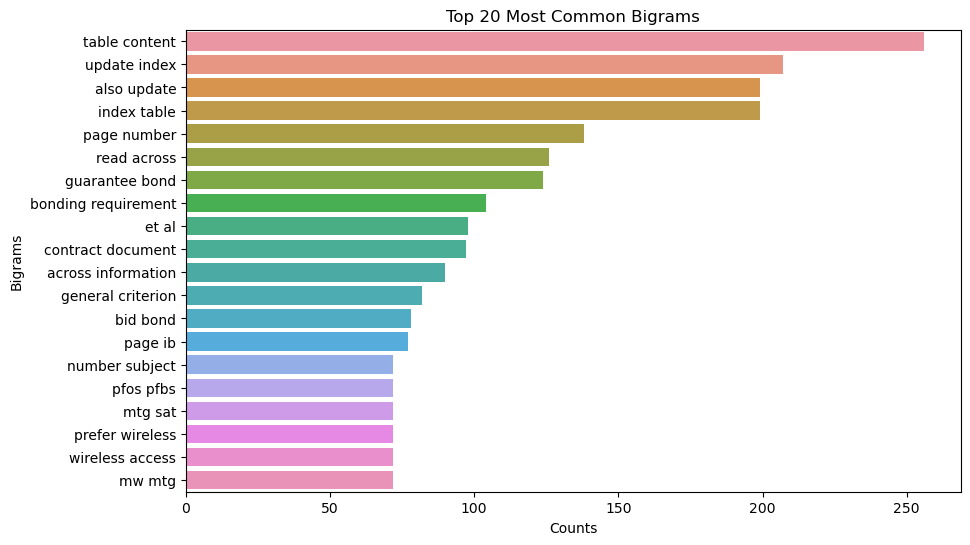

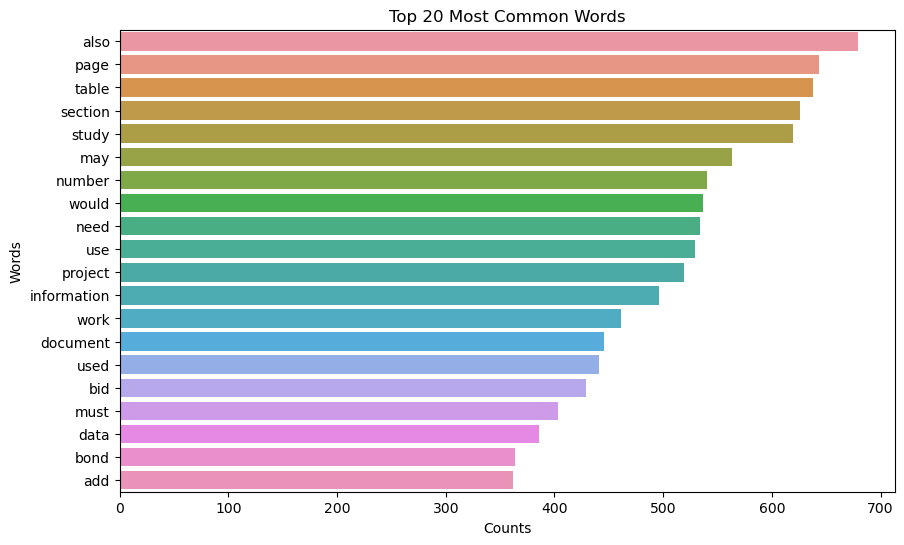

In [11]:
from nltk.probability import FreqDist
from nltk.util import ngrams

# Function to generate n-grams
def generate_ngrams(text, n=2):
    words = text.split()
    return list(ngrams(words, n))

# Generating bigrams for the dataset
bigrams = [bigram for tweet in dfcomments['final_text'] for bigram in generate_ngrams(tweet, n=2)]

# Frequency distribution of bigrams
fdist_bigrams = FreqDist(bigrams)

# Prepare data for the histogram of the most common bigrams
most_common_bigrams = fdist_bigrams.most_common(20)
bigram_labels = [' '.join(bigram) for bigram, _ in most_common_bigrams]
bigram_counts = [count for _, count in most_common_bigrams]

# Plotting the histogram for bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x=bigram_counts, y=bigram_labels)
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Counts')
plt.ylabel('Bigrams')
plt.show()

# Frequency distribution of individual words
fdist = FreqDist(word for tweet in dfcomments['final_text'] for word in tweet.split())

# Prepare data for the histogram of the most common words
most_common_words = fdist.most_common(20)
word_labels = [word for word, _ in most_common_words]
word_counts = [count for _, count in most_common_words]

# Plotting the histogram for individual words
plt.figure(figsize=(10, 6))
sns.barplot(x=word_counts, y=word_labels)
plt.title('Top 20 Most Common Words')
plt.xlabel('Counts')
plt.ylabel('Words')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, mean_squared_error, f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# Assuming df is your DataFrame and it's already loaded
X_train, X_test, y_train, y_test = train_test_split(dfcomments['final_text'], dfcomments['level_0'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2), stop_words=None)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the oversampling strategy and apply it
oversample = RandomOverSampler(sampling_strategy='auto')  # 'auto' will resample all classes but the majority class
X_train_res, y_train_res = oversample.fit_resample(X_train_tfidf, y_train_encoded)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize and run GridSearchCV
grid_search = GridSearchCV(SVC(probability=True), param_grid, scoring='f1_weighted', cv=5)
grid_search.fit(X_train_res, y_train_res)

# Get the best model
best_svm_model = grid_search.best_estimator_

# Predict on the test set and evaluate
y_pred = best_svm_model.predict(X_test_tfidf)

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_encoded, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# F1 Score
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Error Rate
error_rate = np.mean(y_pred != y_test_encoded)
print(f"Error Rate: {error_rate}")


Classification Report:
                      precision    recall  f1-score   support

INFORMATION EXCHANGE       0.77      0.76      0.76       508
        MODIFICATION       0.70      0.66      0.68       342
               OTHER       0.58      0.72      0.64        68
SOCIAL COMMUNICATION       0.62      0.65      0.63        81

            accuracy                           0.72       999
           macro avg       0.66      0.70      0.68       999
        weighted avg       0.72      0.72      0.72       999

Mean Squared Error (MSE): 0.7227227227227228
F1 Score: 0.7162882610174272
Error Rate: 0.28428428428428426


In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure NLTK resources are downloaded (do this once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_and_clean(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user tags (@mentions)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords and lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(processed_tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\srava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
# Sample comments for prediction
comments = [
    "Can we include the latest survey data in our analysis?",
    "Great teamwork on the recent launch, everyone should be proud!",
    "Where can I find the financial report for Q2?"
]

# Assuming preprocess_and_clean is your preprocessing function
processed_comments = [preprocess_and_clean(comment) for comment in comments]

# Vectorize the comments (ensure tfidf_vectorizer is fitted on your training data)
comments_tfidf = tfidf_vectorizer.transform(processed_comments)

# Predict using the trained SVM model (best_svm_model)
predictions = best_svm_model.predict(comments_tfidf)

# Convert predictions back to label names
predicted_labels = label_encoder.inverse_transform(predictions)

# Displaying the predictions
for comment, prediction in zip(comments, predicted_labels):
    print(f'Comment: "{comment}"\nPredicted Intent: {prediction}\n')


Comment: "Can we include the latest survey data in our analysis?"
Predicted Intent: INFORMATION EXCHANGE

Comment: "Great teamwork on the recent launch, everyone should be proud!"
Predicted Intent: MODIFICATION

Comment: "Where can I find the financial report for Q2?"
Predicted Intent: INFORMATION EXCHANGE



# Data Visualization

In [15]:
dfcomments.describe()

document_selected_sentences  is_sentence  num_sentence  \
count                  4991.000000  4991.000000   4991.000000   
mean                      1.575235     0.491885      1.230615   
std                       3.339132     0.499984      1.859470   
min                       0.000000     0.000000      0.000000   
25%                       1.000000     0.000000      0.000000   
50%                       1.000000     0.000000      0.000000   
75%                       1.000000     1.000000      2.000000   
max                     119.000000     1.000000     17.000000   

       total_sentences  grammar_checked  grammatical_errors  has_replies  \
count      4991.000000      4991.000000         4991.000000  4991.000000   
mean          2.804047         0.661992            0.035865     0.013224   
std           2.482902         0.473079            0.210249     0.114243   
min           1.000000         0.000000            0.000000     0.000000   
25%           1.000000         0.000000            0.000000     0.000000   
50%           2.000000         1.000000            0.000000     0.000000   
75%           3.000000         1.000000            0.000000     0.000000   
max          17.000000         1.000000            3.000000     1.000000   

          is_reply    num_reply  num_replies  is_resolved  num_hyperlinks  \
count  4991.000000  4991.000000  4991.000000  4991.000000     4991.000000   
mean      0.006211     0.007013     0.014426     0.007413        0.022040   
std       0.078574     0.094704     0.130485     0.085790        0.281556   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.000000     0.000000     0.000000     0.000000        0.000000   
50%       0.000000     0.000000     0.000000     0.000000        0.000000   
75%       0.000000     0.000000     0.000000     0.000000        0.000000   
max       1.000000     3.000000     3.000000     1.000000       10.000000   

        num_images  spelling_checked  spelling_errors  tracked_changes  
count  4991.000000       4991.000000      4991.000000      4991.000000  
mean      0.004007          0.783811         0.072731         0.232218  
std       0.063182          0.411686         0.619748         1.255837  
min       0.000000          0.000000         0.000000         0.000000  
25%       0.000000          1.000000         0.000000         0.000000  
50%       0.000000          1.000000         0.000000         0.000000  
75%       0.000000          1.000000         0.000000         0.000000  
max       1.000000          1.000000        30.000000        29.000000

In [16]:
summary_stats = dfcomments.describe()
print(summary_stats)


       document_selected_sentences  is_sentence  num_sentence  \
count                  4991.000000  4991.000000   4991.000000   
mean                      1.575235     0.491885      1.230615   
std                       3.339132     0.499984      1.859470   
min                       0.000000     0.000000      0.000000   
25%                       1.000000     0.000000      0.000000   
50%                       1.000000     0.000000      0.000000   
75%                       1.000000     1.000000      2.000000   
max                     119.000000     1.000000     17.000000   

       total_sentences  grammar_checked  grammatical_errors  has_replies  \
count      4991.000000      4991.000000         4991.000000  4991.000000   
mean          2.804047         0.661992            0.035865     0.013224   
std           2.482902         0.473079            0.210249     0.114243   
min           1.000000         0.000000            0.000000     0.000000   
25%           1.000000         0.0

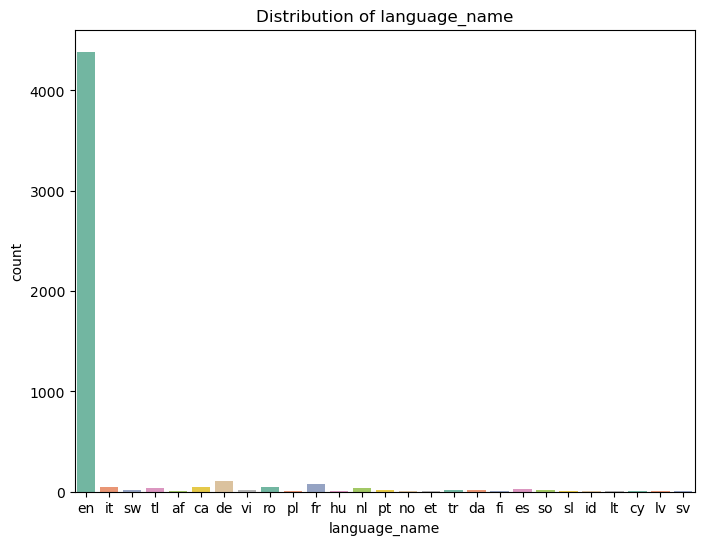

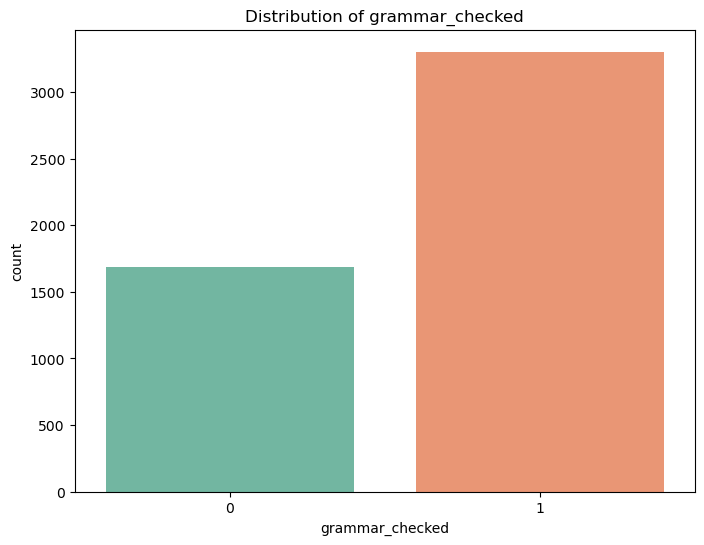

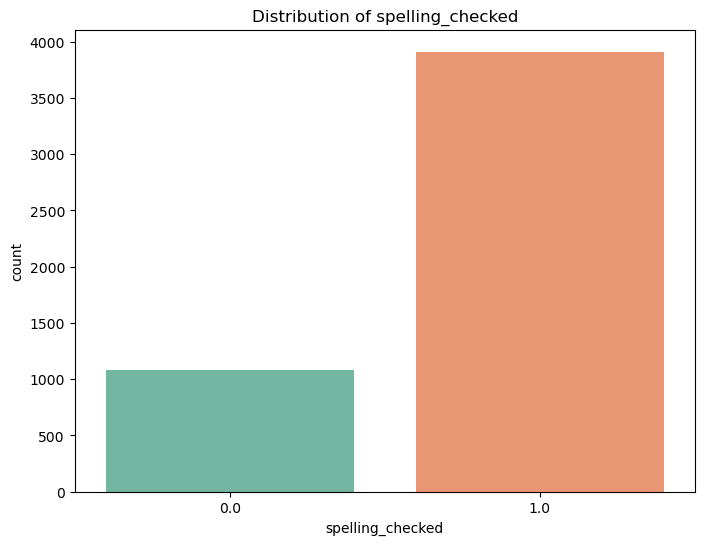

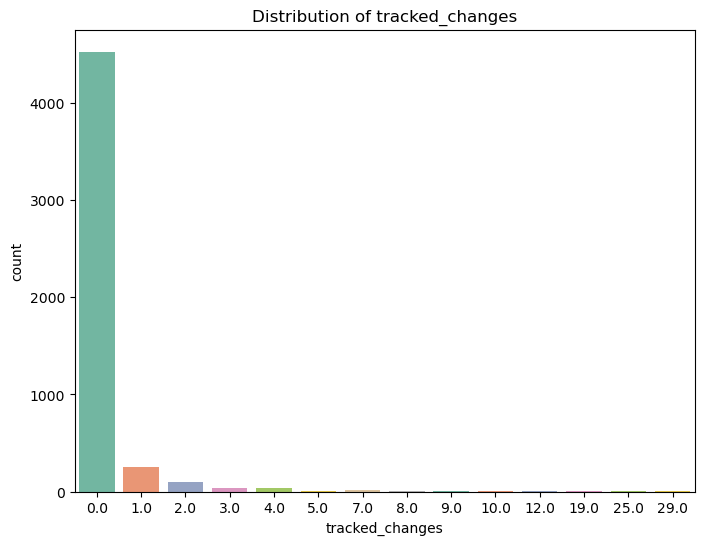

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['language_name', 'grammar_checked', 'spelling_checked', 'tracked_changes']

# Define color palette
color_palette = sns.color_palette("Set2")

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=dfcomments, palette=color_palette)
    plt.title(f'Distribution of {var}')
    plt.show()


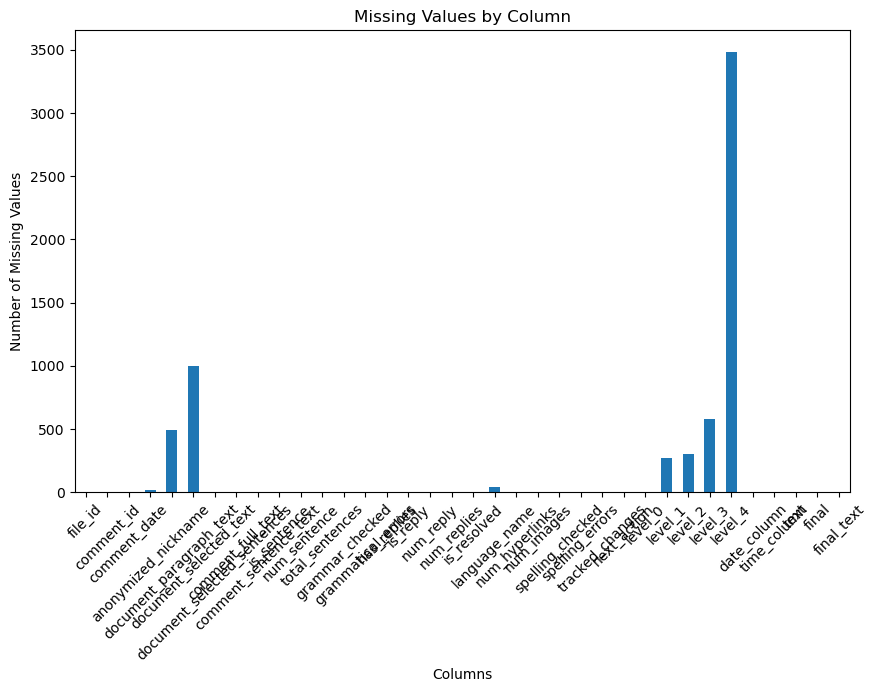

In [18]:
# 8. Missing Values Analysis
missing_values = dfcomments.isnull().sum()
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

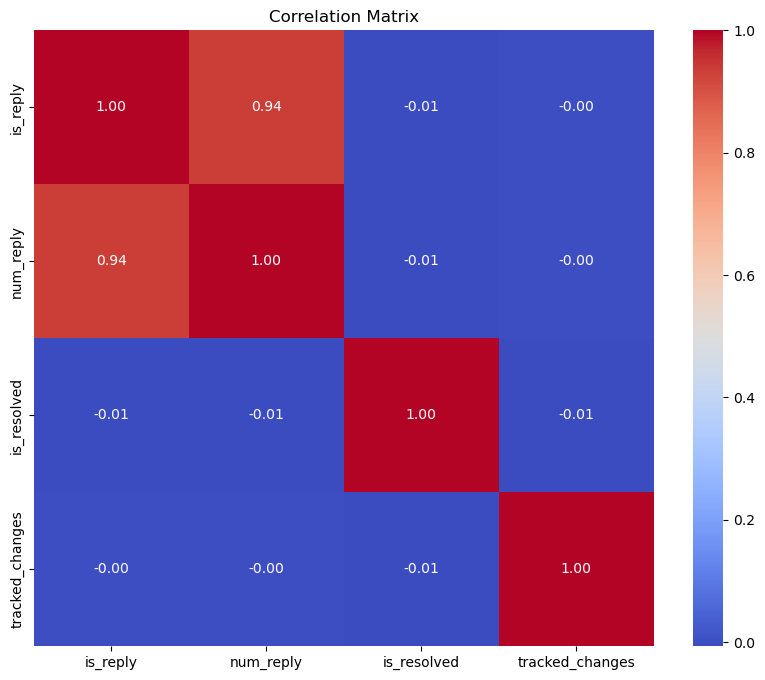

In [19]:
# 5. Correlation Analysis
numerical_vars = ['is_reply', 'num_reply', 'is_resolved', 'tracked_changes']
corr_matrix = dfcomments[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

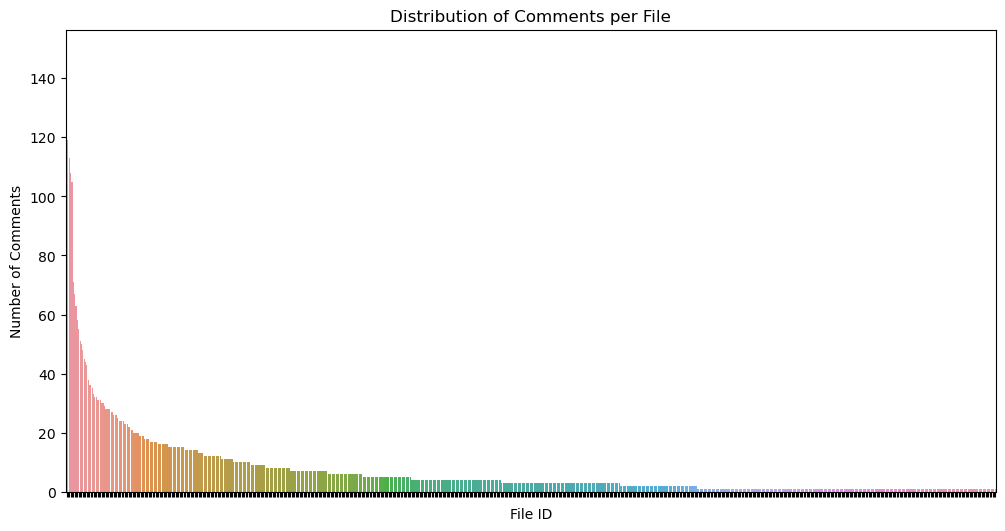

In [20]:

# 6. Feature Engineering (example: calculating comment length)
dfcomments['comment_length'] = dfcomments['comment_full_text'].str.len()

# 7. Distribution of Comments per File
plt.figure(figsize=(12, 6))
sns.countplot(x='file_id', data=dfcomments, order=dfcomments['file_id'].value_counts().index)
plt.title('Distribution of Comments per File')
plt.xlabel('File ID')
plt.ylabel('Number of Comments')
plt.gca().set_xticklabels([])
plt.show()

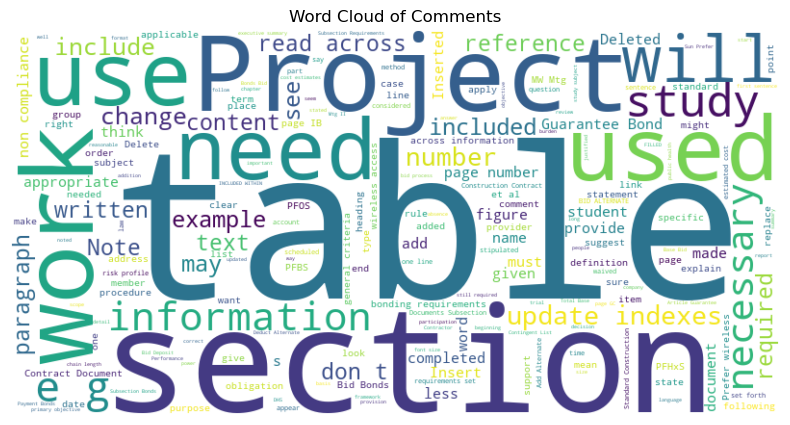

In [21]:
comments_text = dfcomments['comment_full_text'].values.tolist()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(comments_text))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

In [22]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\srava\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

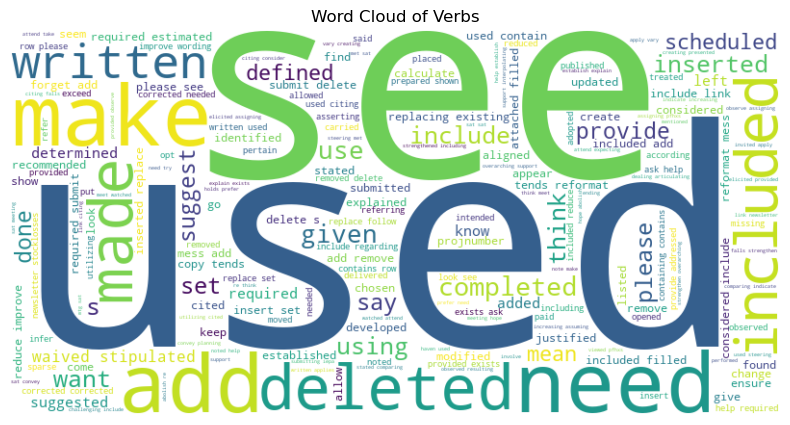

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud

# Assuming df is your DataFrame and 'comment_full_text' is the column containing text data
comments = dfcomments['comment_full_text'].dropna().str.lower().str.cat(sep=' ')

# Tokenize the text into words
tokens = word_tokenize(comments)

# Tag the words with their parts of speech
tagged_words = pos_tag(tokens)

# Filter out verbs (VB, VBD, VBG, VBN, VBP, VBZ) from the tagged words
verbs = [word for word, tag in tagged_words if tag.startswith('VB')]

# Join the verbs into a single string for word cloud generation
verbs_text = ' '.join(verbs)

# Generate word cloud of verbs
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(verbs_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Verbs')
plt.axis('off')
plt.show()


C:\Users\srava\AppData\Local\Temp\ipykernel_14392\2177487205.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfcomments['comment_date'] = pd.to_datetime(dfcomments['comment_date'], errors='coerce')
C:\Users\srava\AppData\Local\Temp\ipykernel_14392\2177487205.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dfcomments['comment_month'] = dfcomments['comment_date'].dt.to_period('M')


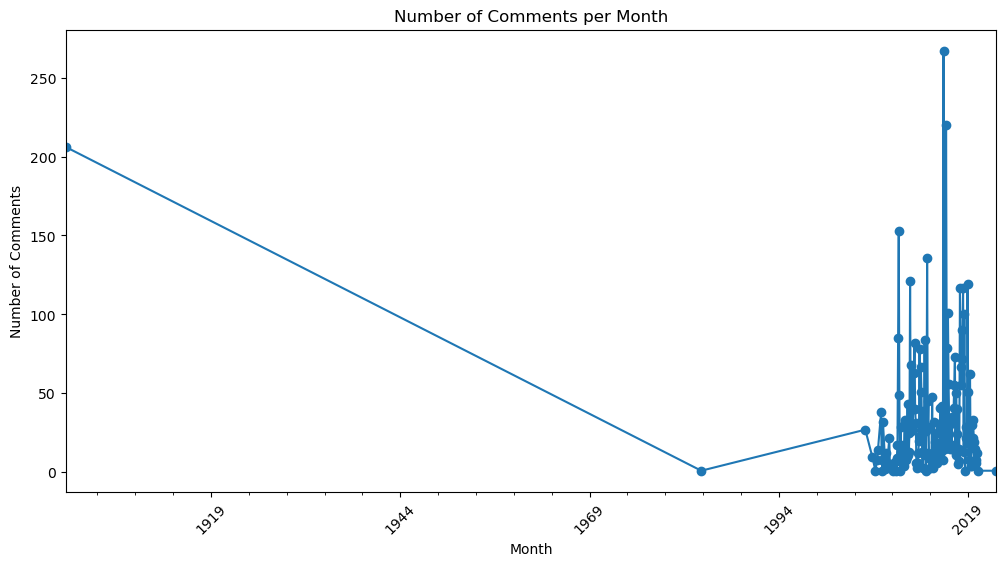

In [24]:
dfcomments['comment_date'] = pd.to_datetime(dfcomments['comment_date'], errors='coerce')
dfcomments['comment_month'] = dfcomments['comment_date'].dt.to_period('M')
comments_per_month = dfcomments.groupby('comment_month').size()
plt.figure(figsize=(12, 6))
comments_per_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Month')
plt.xticks(rotation=45)
plt.show()

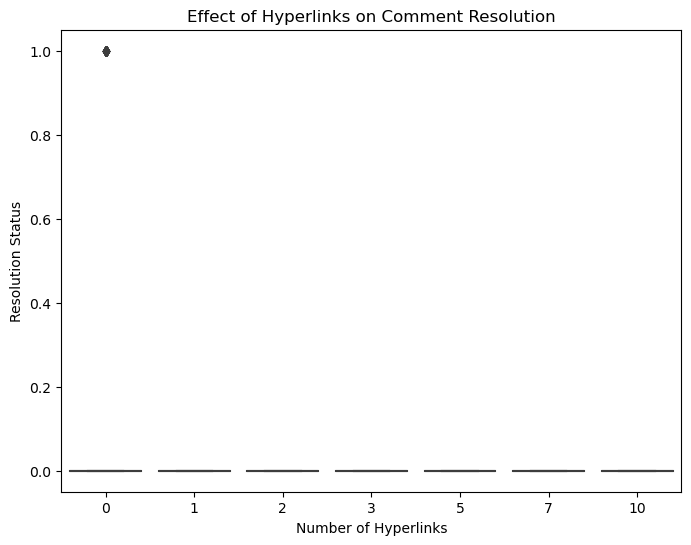

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='num_hyperlinks', y='is_resolved', data=dfcomments)
plt.title('Effect of Hyperlinks on Comment Resolution')
plt.xlabel('Number of Hyperlinks')
plt.ylabel('Resolution Status')
plt.show()

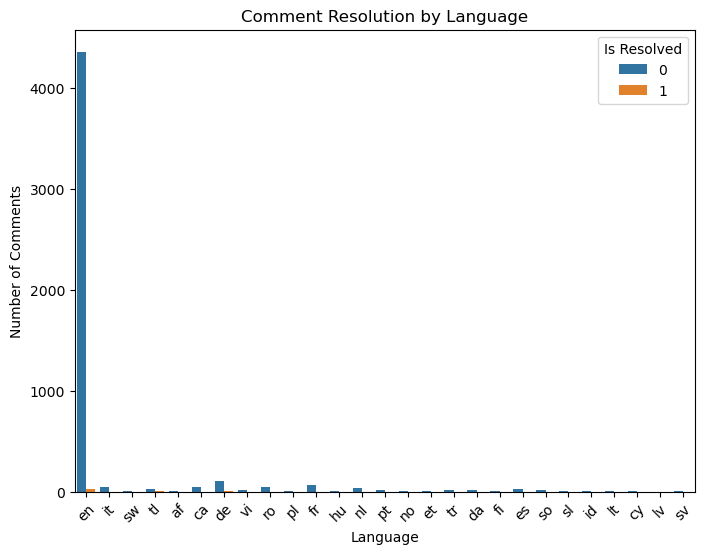

In [26]:
# 10. Grouped Analysis (example: language vs. comment resolution)
plt.figure(figsize=(8, 6))
sns.countplot(x='language_name', hue='is_resolved', data=dfcomments)
plt.title('Comment Resolution by Language')
plt.xlabel('Language')
plt.ylabel('Number of Comments')
plt.legend(title='Is Resolved', loc='upper right')
plt.xticks(rotation=45)
plt.show()

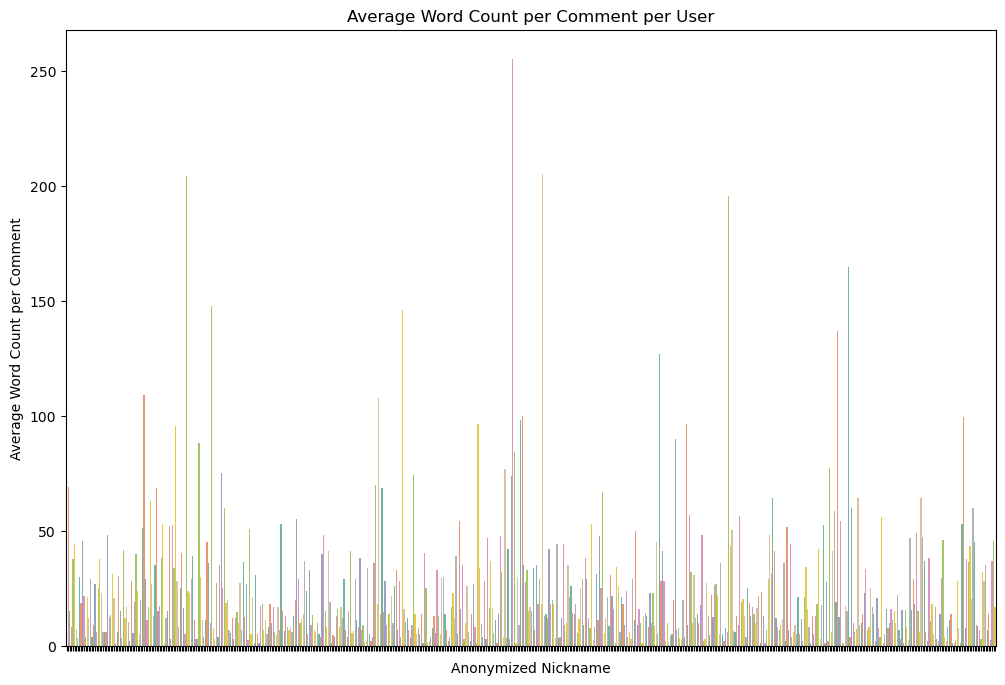

In [27]:
# Define color palette
color_palette = sns.color_palette("Set2")

# Calculate word count per comment
dfcomments['comment_word_count'] = dfcomments['comment_full_text'].apply(lambda x: len(str(x).split()))

# Calculate average word count per user
average_word_count_per_user = dfcomments.groupby('anonymized_nickname')['comment_word_count'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='anonymized_nickname', y='comment_word_count', data=average_word_count_per_user, palette=color_palette)
plt.xlabel('Anonymized Nickname')
plt.ylabel('Average Word Count per Comment')
plt.title('Average Word Count per Comment per User')
plt.xticks(rotation=45)
plt.gca().set_xticklabels([])
plt.show()

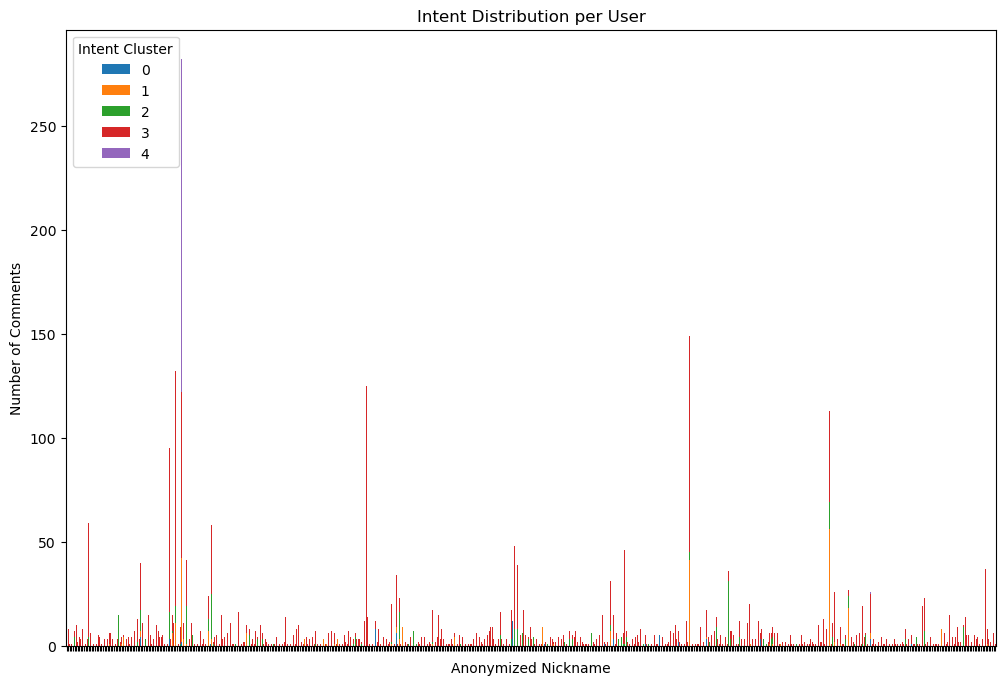

In [28]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the dataset
# Assuming your dataset is stored in a DataFrame named df

# Drop rows with missing text data
dfcomments = dfcomments.dropna(subset=['comment_full_text'])

# Apply TF-IDF vectorization to convert text data into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dfcomments['comment_full_text'])

# Apply KMeans clustering to group comments into clusters (intents)
num_clusters = 5  # You can adjust the number of clusters based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
dfcomments['intent_cluster'] = kmeans.fit_predict(X)

# Visualization: Intent distribution per user
intent_distribution = dfcomments.groupby(['anonymized_nickname', 'intent_cluster']).size().unstack(fill_value=0)
intent_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Anonymized Nickname')
plt.ylabel('Number of Comments')
plt.title('Intent Distribution per User')
plt.legend(title='Intent Cluster')
plt.gca().set_xticklabels([])

plt.show()


# Key predictors

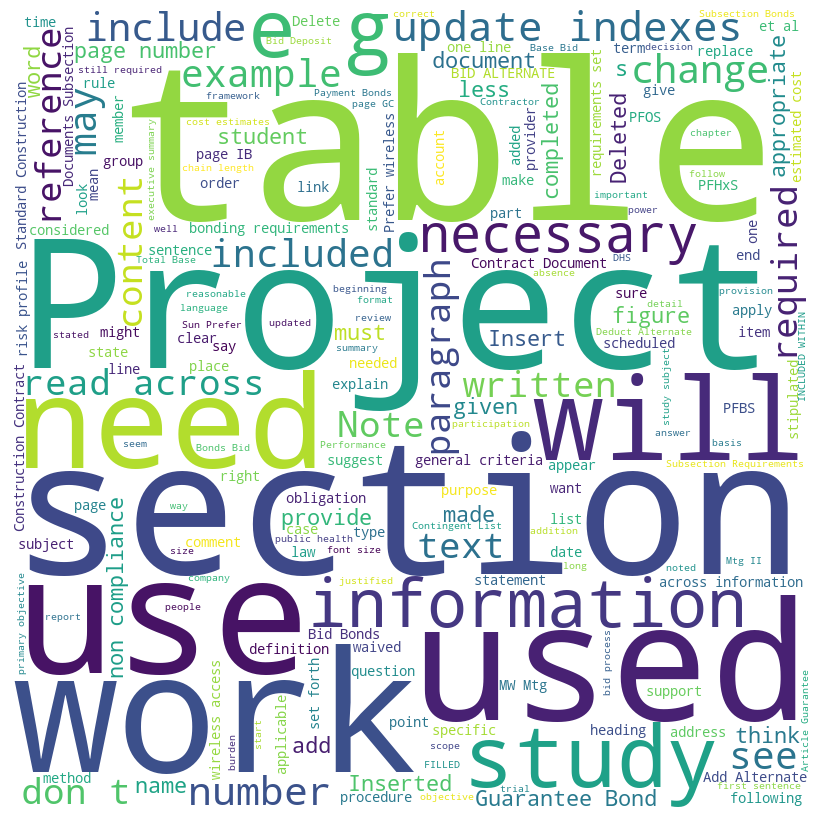

is_resolved
0    0.013928
1    0.081081
Name: num_replies, dtype: float64

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generating a word cloud for the 'comment_full_text' to visualize common words used in the comments
comment_text = ' '.join(dfcomments['comment_full_text'].dropna())
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(comment_text)

# Plotting the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Analyzing 'num_replies' and 'is_resolved'
resolved_comments = dfcomments.groupby('is_resolved')['num_replies'].mean()

resolved_comments


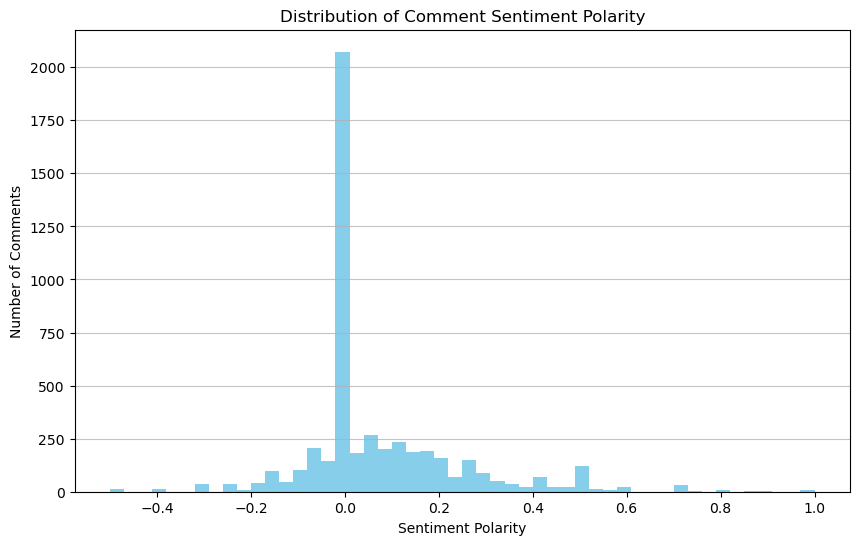

is_resolved
0    0.072004
1    0.138465
Name: sentiment_polarity, dtype: float64

In [30]:
from textblob import TextBlob

# Performing sentiment analysis on 'comment_full_text'
# Note: TextBlob provides a simple API to conduct sentiment analysis. The sentiment property returns a namedtuple
# of the form Sentiment(polarity, subjectivity). Polarity is a float within the range [-1.0, 1.0] where -1 means
# negative sentiment and 1 means positive sentiment.

# Applying sentiment analysis to each comment
dfcomments['sentiment_polarity'] = dfcomments['comment_full_text'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualizing the distribution of sentiment polarity
plt.figure(figsize=(10, 6))
plt.hist(dfcomments['sentiment_polarity'].dropna(), bins=50, color='skyblue')
plt.title('Distribution of Comment Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Comments')
plt.grid(axis='y', alpha=0.75)

plt.show()

# Investigating the relationship between sentiment polarity and resolution status
average_sentiment_by_resolution = dfcomments.groupby('is_resolved')['sentiment_polarity'].mean()

average_sentiment_by_resolution


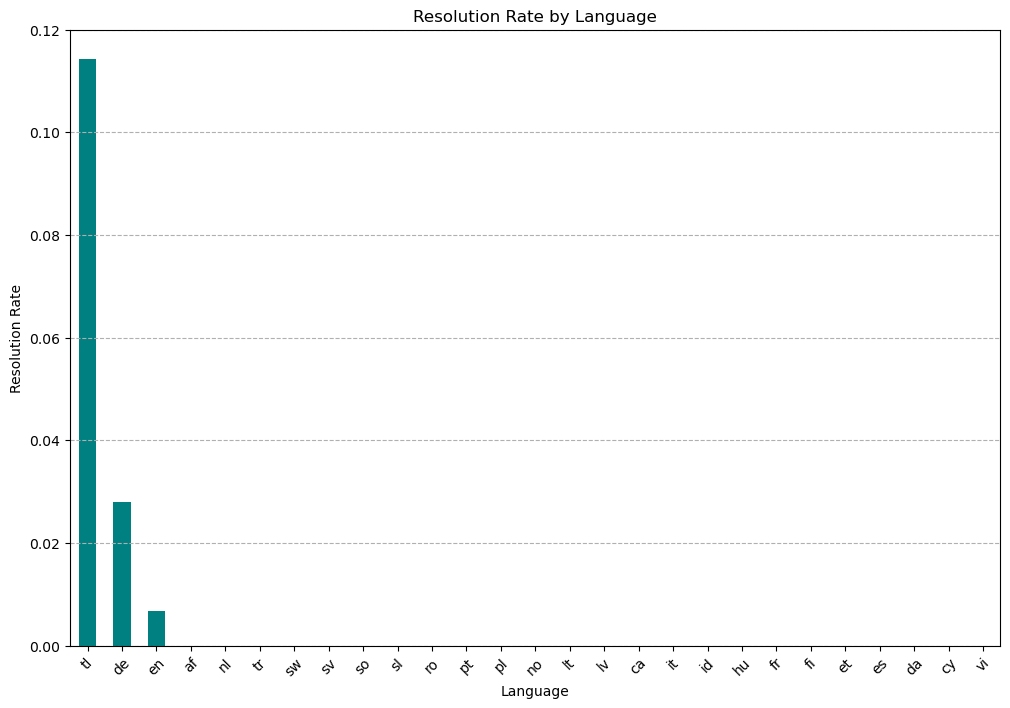

In [31]:
# Aggregating comments by 'language_name' and calculating resolution rates
language_resolution_counts = dfcomments.groupby('language_name')['is_resolved'].agg(['count', 'sum'])
language_resolution_counts['resolution_rate'] = language_resolution_counts['sum'] / language_resolution_counts['count']

# Sorting languages by resolution rate for better visualization
language_resolution_sorted = language_resolution_counts.sort_values(by='resolution_rate', ascending=False)

# Visualizing resolution rates across languages
plt.figure(figsize=(12, 8))
language_resolution_sorted['resolution_rate'].plot(kind='bar', color='teal')
plt.title('Resolution Rate by Language')
plt.xlabel('Language')
plt.ylabel('Resolution Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()


C:\Users\srava\AppData\Local\Temp\ipykernel_14392\1501610600.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dfcomments['year_month'] = dfcomments['comment_datetime'].dt.to_period('M')


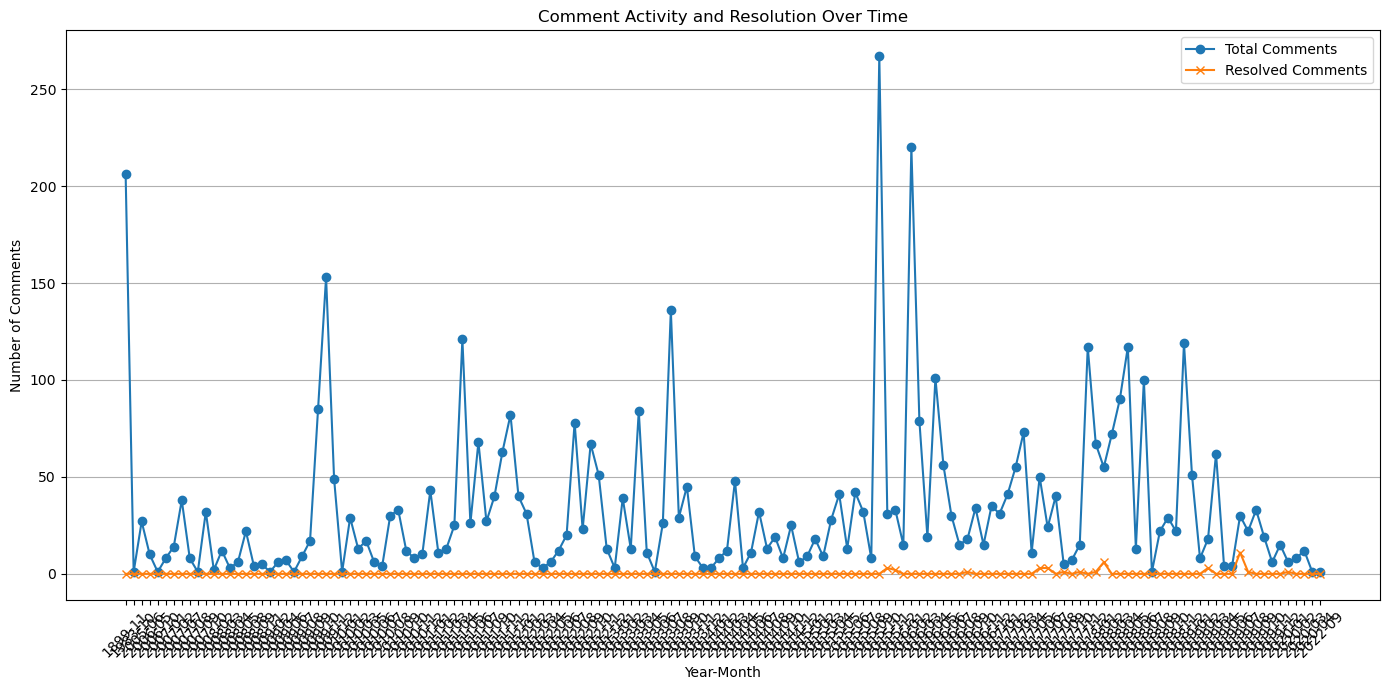

In [32]:
# Converting 'comment_date' to datetime for temporal analysis
dfcomments['comment_datetime'] = pd.to_datetime(dfcomments['comment_date'], errors='coerce')

# Extracting year and month for grouping
dfcomments['year_month'] = dfcomments['comment_datetime'].dt.to_period('M')

# Grouping by year and month to analyze comment activity over time
comment_activity_over_time = dfcomments.groupby('year_month').agg(total_comments=('comment_id', 'count'),
                                                           resolved_comments=('is_resolved', sum)).reset_index()

# Plotting comment activity and resolution status over time
plt.figure(figsize=(14, 7))

plt.plot(comment_activity_over_time['year_month'].astype(str), comment_activity_over_time['total_comments'], label='Total Comments', marker='o')
plt.plot(comment_activity_over_time['year_month'].astype(str), comment_activity_over_time['resolved_comments'], label='Resolved Comments', marker='x')

plt.xticks(rotation=45)
plt.title('Comment Activity and Resolution Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Comments')
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()


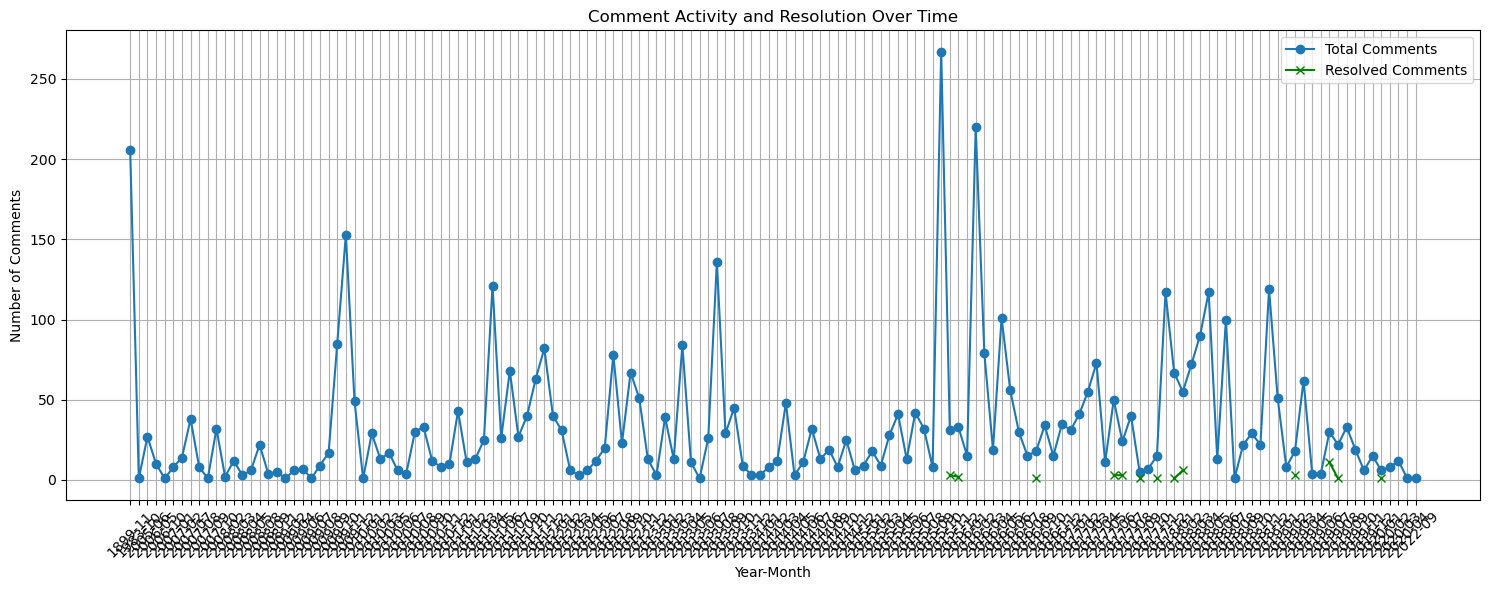

In [33]:
# Correcting the approach for temporal analysis
# Ensuring that 'comment_date' is properly converted and used for temporal analysis

# First, let's ensure the 'comment_date' column is correctly formatted as datetime
dfcomments['comment_datetime'] = pd.to_datetime(dfcomments['comment_date'], errors='coerce', utc=True)

# Creating a new column for year-month extraction
dfcomments['year_month'] = dfcomments['comment_datetime'].dt.strftime('%Y-%m')

# Aggregating data by year-month
comments_per_month = dfcomments.groupby('year_month').size()
resolved_comments_per_month = dfcomments[dfcomments['is_resolved'] == 1].groupby('year_month').size()

# Creating a DataFrame for easier plotting
temporal_data = pd.DataFrame({
    'Total Comments': comments_per_month,
    'Resolved Comments': resolved_comments_per_month
}).reset_index()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(temporal_data['year_month'], temporal_data['Total Comments'], label='Total Comments', marker='o')
plt.plot(temporal_data['year_month'], temporal_data['Resolved Comments'], label='Resolved Comments', color='green', marker='x')
plt.xticks(rotation=45)
plt.title('Comment Activity and Resolution Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Comments')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


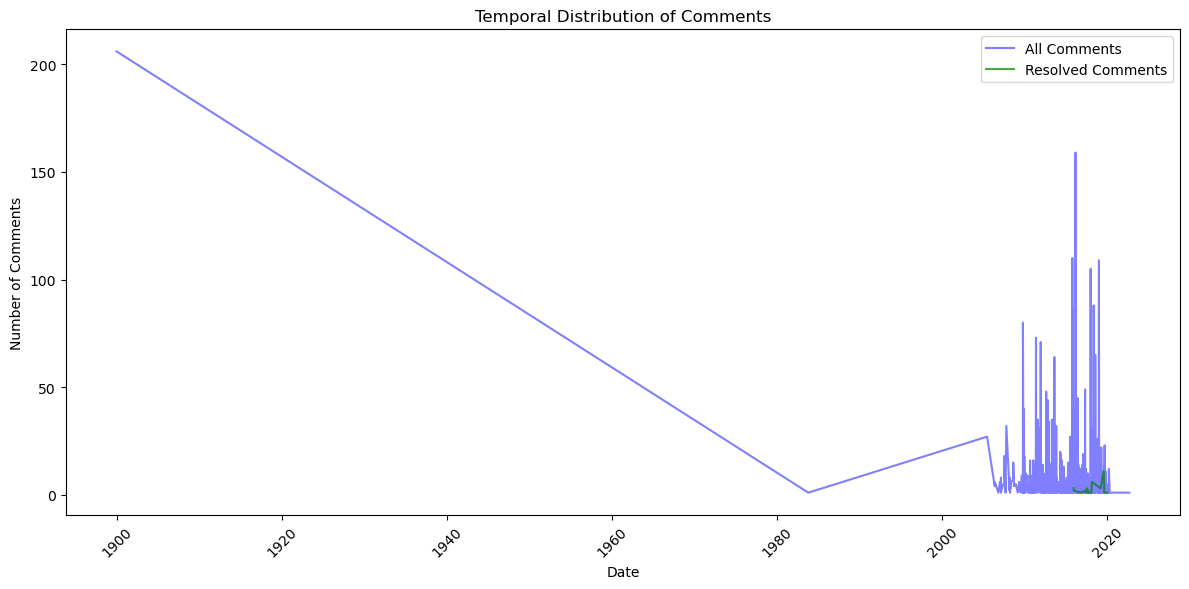

In [34]:
# For temporal analysis, we'll examine the distribution of comments over time, both in terms of creation and resolution.

# Converting 'comment_date' to datetime
dfcomments['comment_datetime'] = pd.to_datetime(dfcomments['comment_date'], errors='coerce')
dfcomments['comment_date_only'] = dfcomments['comment_datetime'].dt.date

# Creating a resolved comments dataframe for temporal analysis
df_resolved = dfcomments[dfcomments['is_resolved'] == 1]

# Counting comments by date for all and resolved comments
comments_by_date = dfcomments.groupby('comment_date_only').size()
resolved_comments_by_date = df_resolved.groupby('comment_date_only').size()

# Plotting the temporal distribution of comments
plt.figure(figsize=(12, 6))

plt.plot(comments_by_date.index, comments_by_date, label='All Comments', color='blue', alpha=0.5)
plt.plot(resolved_comments_by_date.index, resolved_comments_by_date, label='Resolved Comments', color='green', alpha=0.7)

plt.title('Temporal Distribution of Comments')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


C:\Users\srava\AppData\Local\Temp\ipykernel_14392\432445744.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dfcomments['comment_year_month'] = dfcomments['comment_datetime'].dt.to_period('M')


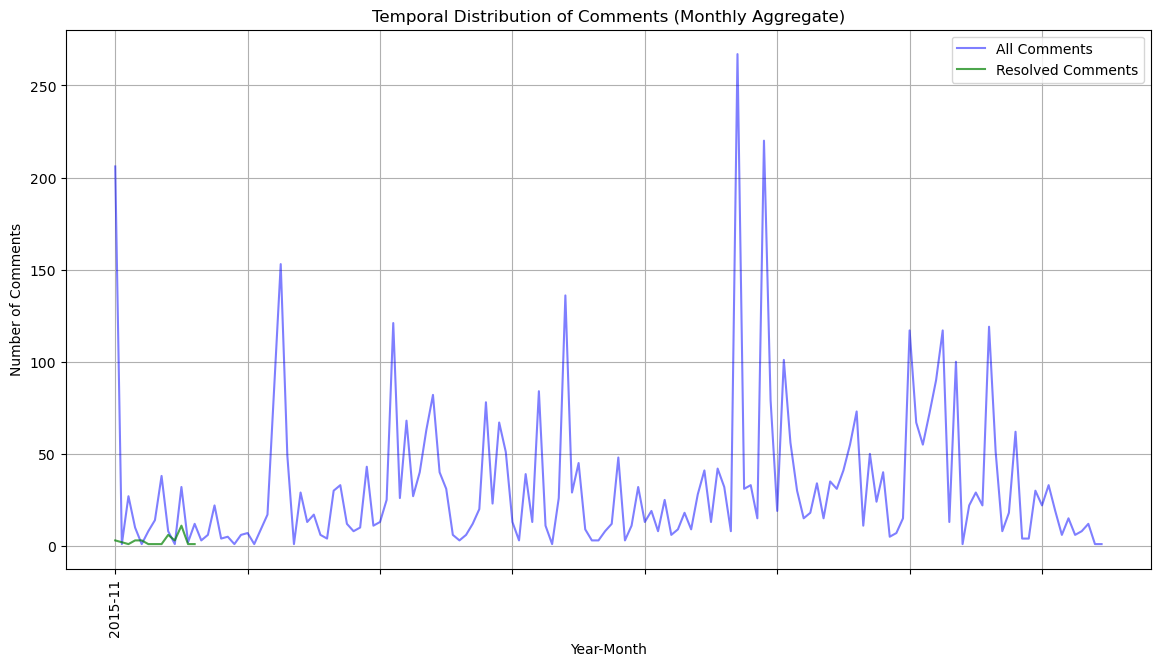

In [35]:
# Adjusting the approach for temporal analysis by aggregating over months

# Extracting year and month for aggregation
dfcomments['comment_year_month'] = dfcomments['comment_datetime'].dt.to_period('M')

# Counting comments by year-month for all and resolved comments
comments_by_month = dfcomments.groupby('year_month').size()
resolved_comments_by_month = df_resolved.groupby('year_month').size()

# Plotting the temporal distribution of comments by month
plt.figure(figsize=(14, 7))

comments_by_month.plot(kind='line', label='All Comments', color='blue', alpha=0.5)
resolved_comments_by_month.plot(kind='line', label='Resolved Comments', color='green', alpha=0.7)

plt.title('Temporal Distribution of Comments (Monthly Aggregate)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Comments')
plt.legend()
plt.xticks(rotation=90)
plt.grid(visible=True)

plt.show()


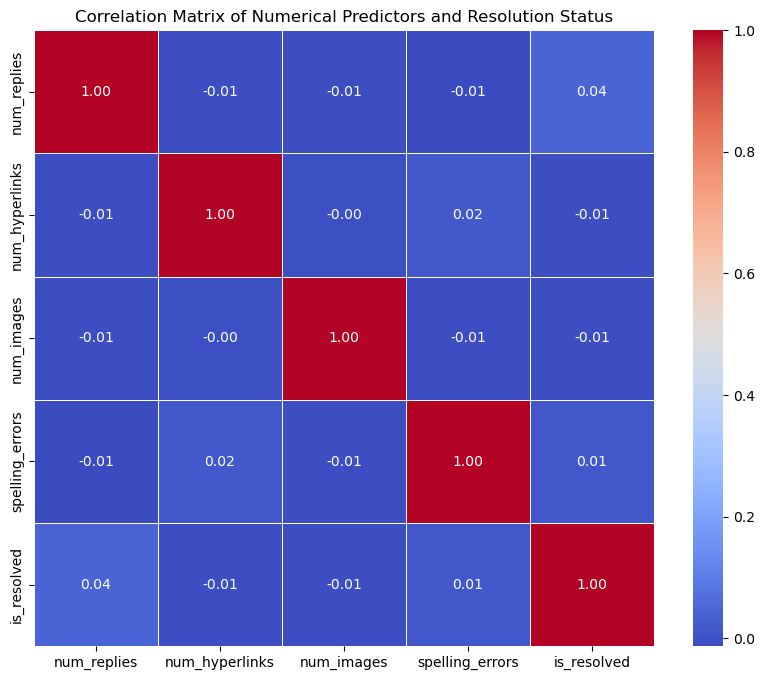

In [36]:
import seaborn as sns

# Selecting numerical predictors for correlation analysis
numerical_cols = ['num_replies', 'num_hyperlinks', 'num_images', 'spelling_errors', 'is_resolved']
correlation_data = dfcomments[numerical_cols]

# Calculating correlation matrix
correlation_matrix = correlation_data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Predictors and Resolution Status')
plt.show()


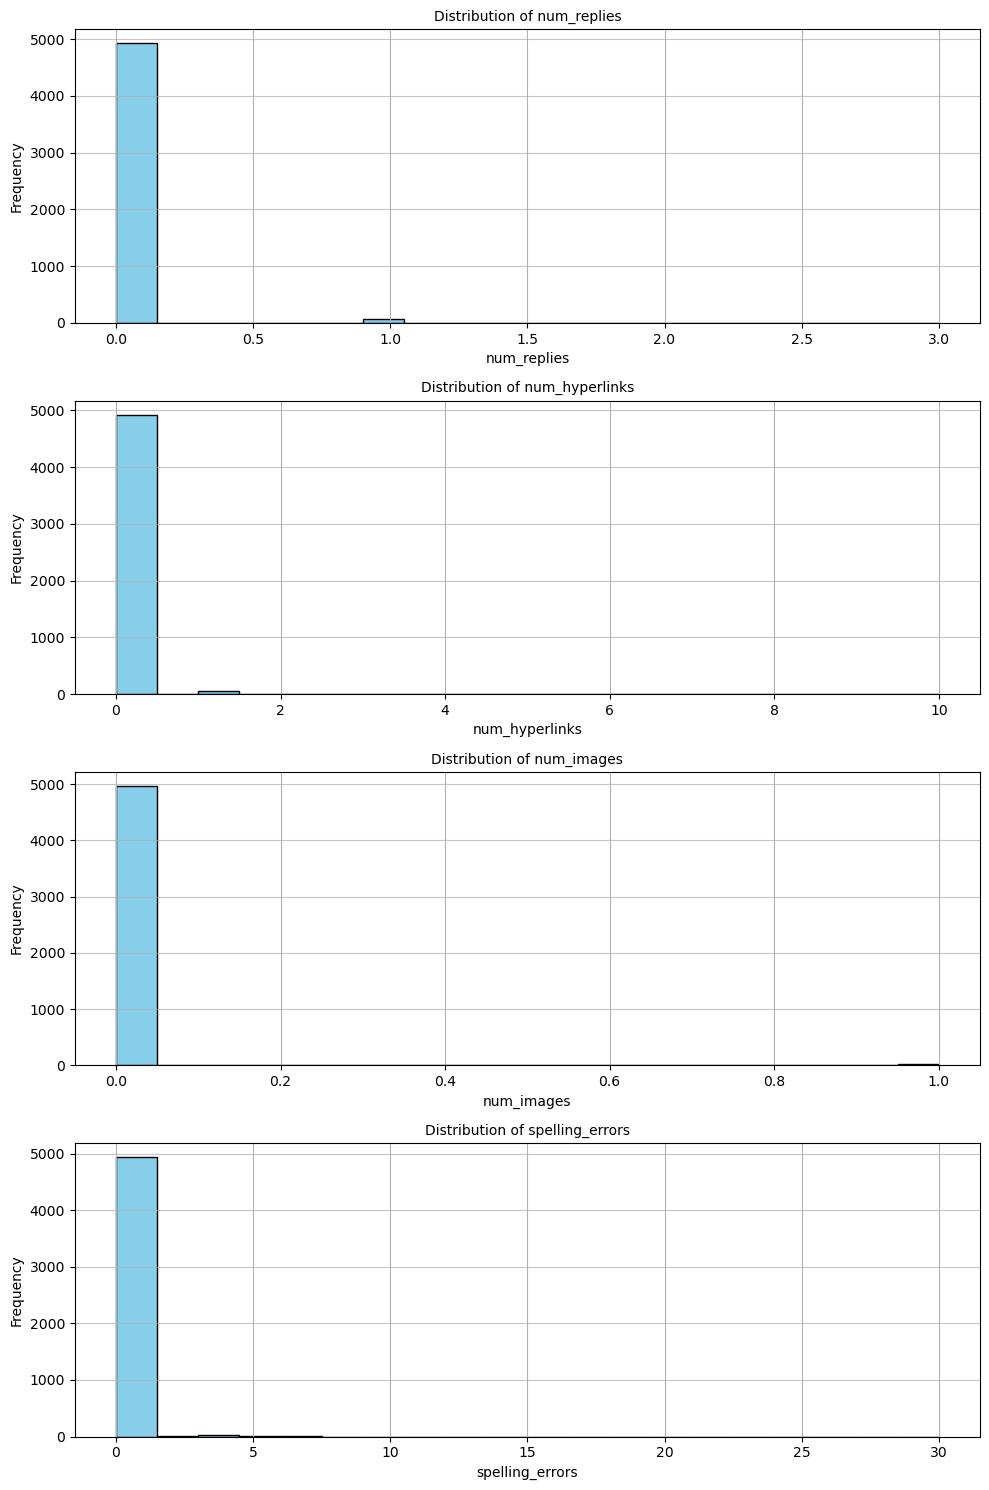

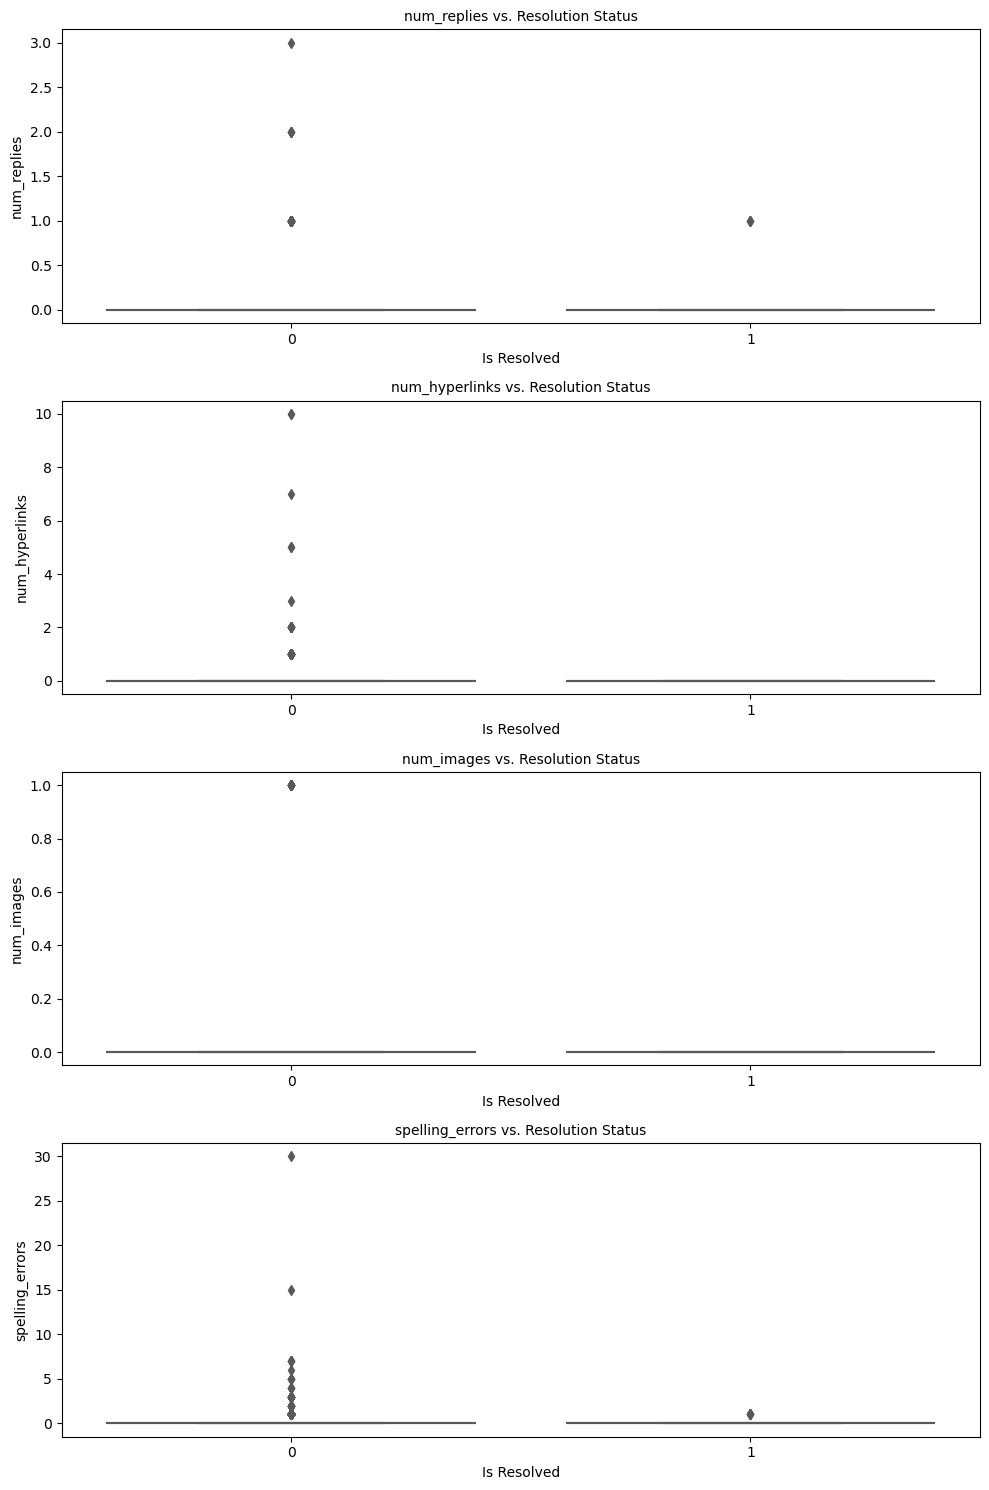

In [37]:
# Let's start with histograms for the distribution of numerical predictors

# Selecting numerical predictor columns for histograms
numerical_predictors = ['num_replies', 'num_hyperlinks', 'num_images', 'spelling_errors']

# Plotting histograms for each numerical predictor
fig, axes = plt.subplots(len(numerical_predictors), 1, figsize=(10, 15))

for i, col in enumerate(numerical_predictors):
    dfcomments[col].hist(ax=axes[i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

# Now, let's plot box plots to explore the relationship between these numerical predictors and the binary outcome (is_resolved)

fig, axes = plt.subplots(len(numerical_predictors), 1, figsize=(10, 15))

for i, col in enumerate(numerical_predictors):
    sns.boxplot(x='is_resolved', y=col, data=dfcomments, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} vs. Resolution Status', fontsize=10)
    axes[i].set_xlabel('Is Resolved')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


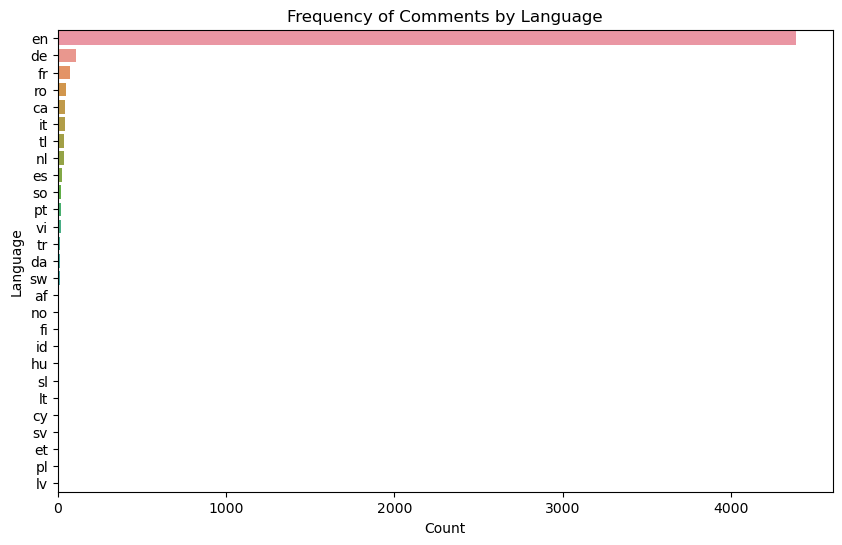

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for 'language_name'
plt.figure(figsize=(10, 6))
sns.countplot(y='language_name', data=dfcomments, order = dfcomments['language_name'].value_counts().index)
plt.title('Frequency of Comments by Language')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


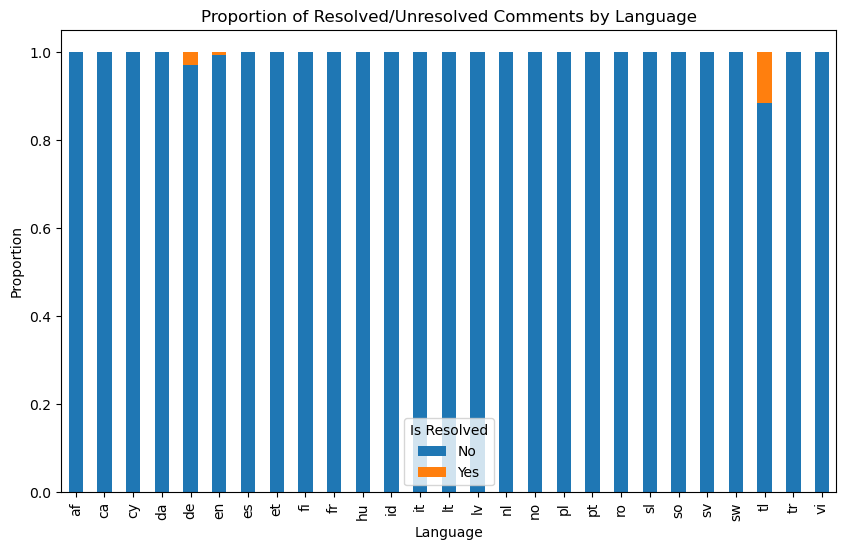

In [39]:
# Calculating the proportion of resolved and unresolved comments by language
resolved_proportion = dfcomments.groupby(['language_name', 'is_resolved']).size().unstack().fillna(0)
resolved_proportion = resolved_proportion.apply(lambda x: x / x.sum(), axis=1)

# Plotting stacked bar chart
resolved_proportion.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Resolved/Unresolved Comments by Language')
plt.xlabel('Language')
plt.ylabel('Proportion')
plt.legend(title='Is Resolved', labels=['No', 'Yes'])
plt.show()


In [40]:
from scipy.stats import chi2_contingency

# Creating a contingency table for 'language_name' and 'is_resolved'
contingency_table = pd.crosstab(dfcomments['language_name'], dfcomments['is_resolved'])

# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')


Chi-square statistic: 63.35701202770693
P-value: 5.8375589590895504e-05


In [41]:
dfcomments['comment_date_only'] = pd.to_datetime(dfcomments['comment_date_only'])


In [42]:
print (dfcomments.columns
      )

Index(['file_id', 'comment_id', 'comment_date', 'anonymized_nickname',
       'document_paragraph_text', 'document_selected_text',
       'document_selected_sentences', 'comment_full_text',
       'comment_sentence_text', 'is_sentence', 'num_sentence',
       'total_sentences', 'grammar_checked', 'grammatical_errors',
       'has_replies', 'is_reply', 'num_reply', 'num_replies', 'is_resolved',
       'language_name', 'num_hyperlinks', 'num_images', 'spelling_checked',
       'spelling_errors', 'tracked_changes', 'next_action', 'level_0',
       'level_1', 'level_2', 'level_3', 'level_4', 'date_column',
       'time_column', 'text', 'final', 'final_text', 'comment_length',
       'comment_month', 'comment_word_count', 'intent_cluster',
       'sentiment_polarity', 'comment_datetime', 'year_month',
       'comment_date_only', 'comment_year_month'],
      dtype='object')


Index(['file_id', 'comment_id', 'comment_date', 'anonymized_nickname',
       'document_paragraph_text', 'document_selected_text',
       'document_selected_sentences', 'comment_full_text',
       'comment_sentence_text', 'is_sentence', 'num_sentence',
       'total_sentences', 'grammar_checked', 'grammatical_errors',
       'has_replies', 'is_reply', 'num_reply', 'num_replies', 'is_resolved',
       'language_name', 'num_hyperlinks', 'num_images', 'spelling_checked',
       'spelling_errors', 'tracked_changes', 'next_action', 'level_0',
       'level_1', 'level_2', 'level_3', 'level_4', 'date_column',
       'time_column', 'text', 'final', 'final_text', 'comment_length',
       'comment_month', 'comment_word_count', 'intent_cluster',
       'sentiment_polarity', 'comment_datetime', 'year_month',
       'comment_date_only', 'comment_year_month'],
      dtype='object')


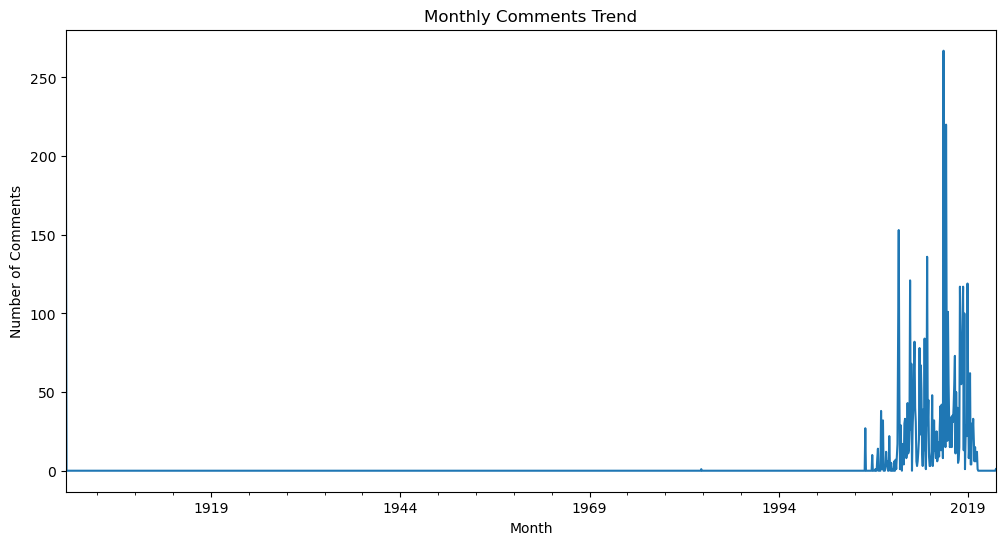

In [43]:
# Check the column names to confirm the date column
print(dfcomments.columns)

# Ensure the comment_date_only column is in datetime format
dfcomments['comment_date_only'] = pd.to_datetime(dfcomments['comment_date_only'])

# Setting the comment_date_only as the index
dfcomments.set_index('comment_date_only', inplace=True)

# Resampling the data to get monthly counts of comments
monthly_comments = dfcomments.resample('M').size()

# Plotting the monthly comments
plt.figure(figsize=(12, 6))
monthly_comments.plot()
plt.title('Monthly Comments Trend')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.show()


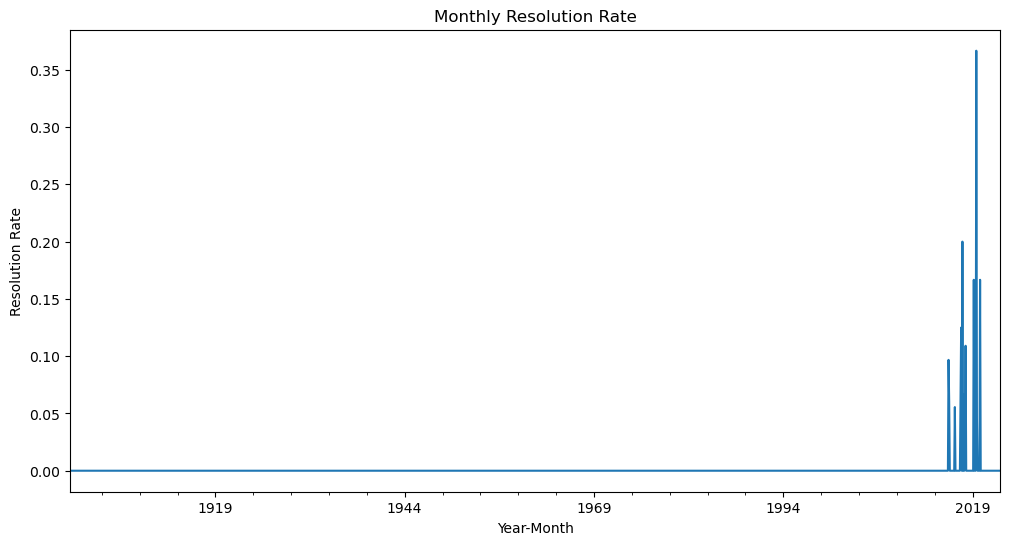

In [44]:
# Adding a year-month column for aggregation
dfcomments['year_month'] = dfcomments.index.to_period('M')

# Aggregating data by year_month to count total and resolved comments
aggregated_data = dfcomments.groupby('year_month').agg(total_comments=('is_resolved', 'size'),
                                                       resolved_comments=('is_resolved', 'sum'))

# Calculating resolution rate
aggregated_data['resolution_rate'] = aggregated_data['resolved_comments'] / aggregated_data['total_comments']

# Plotting the resolution rate over time
plt.figure(figsize=(12, 6))
aggregated_data['resolution_rate'].plot()
plt.title('Monthly Resolution Rate')
plt.xlabel('Year-Month')
plt.ylabel('Resolution Rate')
plt.show()


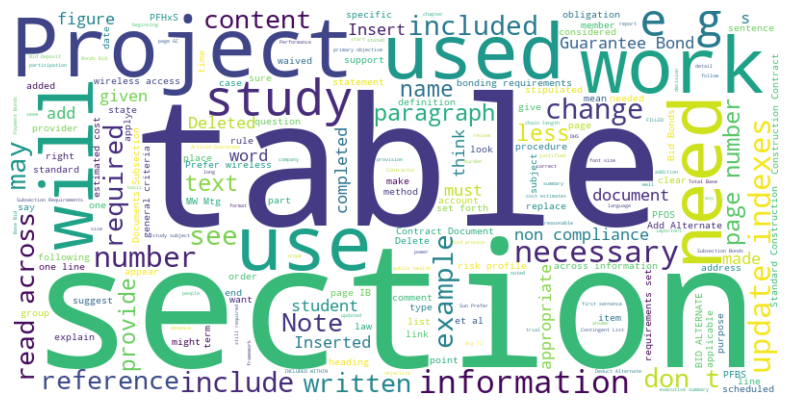

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Joining all the comments into a single text
all_comments = ' '.join(dfcomments['comment_full_text'].dropna())

# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('the', 13074), ('.', 10333), (',', 7021), ('to', 6007), ('of', 5951), ('and', 4802), ('in', 3645), ('be', 3411), ('is', 3344), ('this', 3126)]


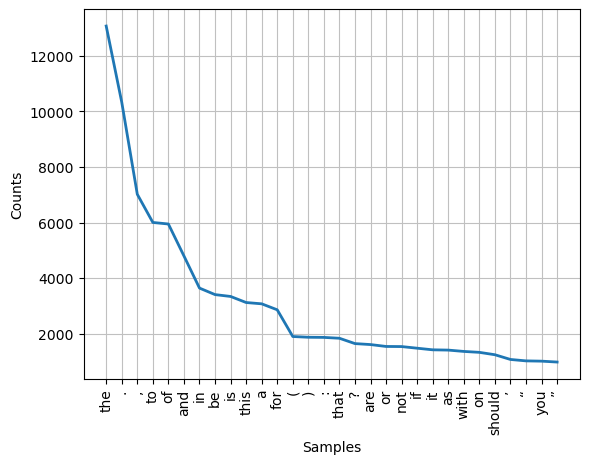

In [46]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Download required NLTK models and corpora
nltk.download('punkt')

# Assuming 'all_comments' is a variable that contains the text you want to analyze
# Tokenizing the comments
tokens = word_tokenize(all_comments.lower())  # Convert to lower case

# Calculating frequency distribution
fdist = FreqDist(tokens)

# Displaying the most common 10 words
print(fdist.most_common(10))

# Plotting the frequency distribution of the first 30 words
fdist.plot(30, cumulative=False)
plt.show()



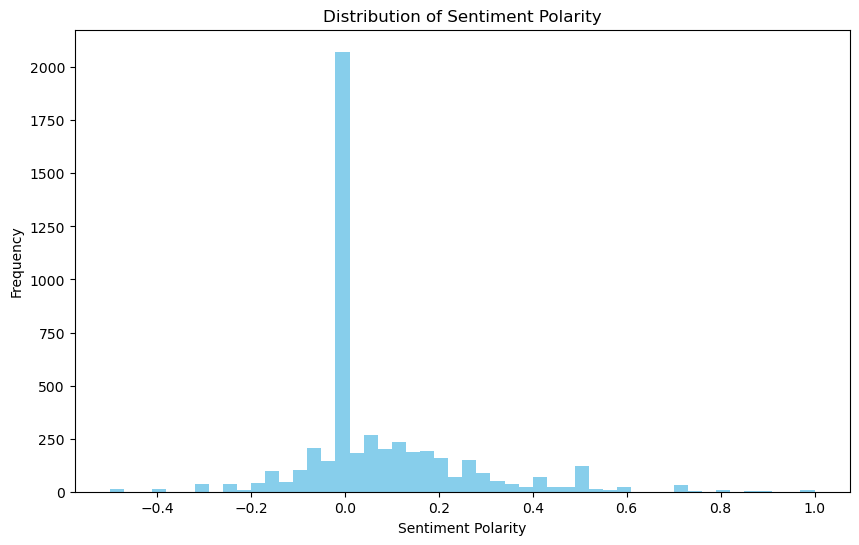

In [47]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Applying the function to each comment
dfcomments['sentiment_polarity'] = dfcomments['comment_full_text'].dropna().apply(calculate_sentiment)

# Visualizing the distribution of sentiment polarity
plt.figure(figsize=(10, 6))
plt.hist(dfcomments['sentiment_polarity'].dropna(), bins=50, color='skyblue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [48]:
# Calculating descriptive statistics for the numerical predictors and the binary outcome 'is_resolved'
descriptive_stats = dfcomments[['num_replies', 'num_hyperlinks', 'num_images', 'spelling_errors', 'is_resolved']].describe()

# Including the count of unique values for 'is_resolved' to understand its distribution
unique_resolved = dfcomments['is_resolved'].value_counts()

descriptive_stats, unique_resolved


(       num_replies  num_hyperlinks   num_images  spelling_errors  is_resolved
 count  4991.000000     4991.000000  4991.000000      4991.000000  4991.000000
 mean      0.014426        0.022040     0.004007         0.072731     0.007413
 std       0.130485        0.281556     0.063182         0.619748     0.085790
 min       0.000000        0.000000     0.000000         0.000000     0.000000
 25%       0.000000        0.000000     0.000000         0.000000     0.000000
 50%       0.000000        0.000000     0.000000         0.000000     0.000000
 75%       0.000000        0.000000     0.000000         0.000000     0.000000
 max       3.000000       10.000000     1.000000        30.000000     1.000000,
 is_resolved
 0    4954
 1      37
 Name: count, dtype: int64)

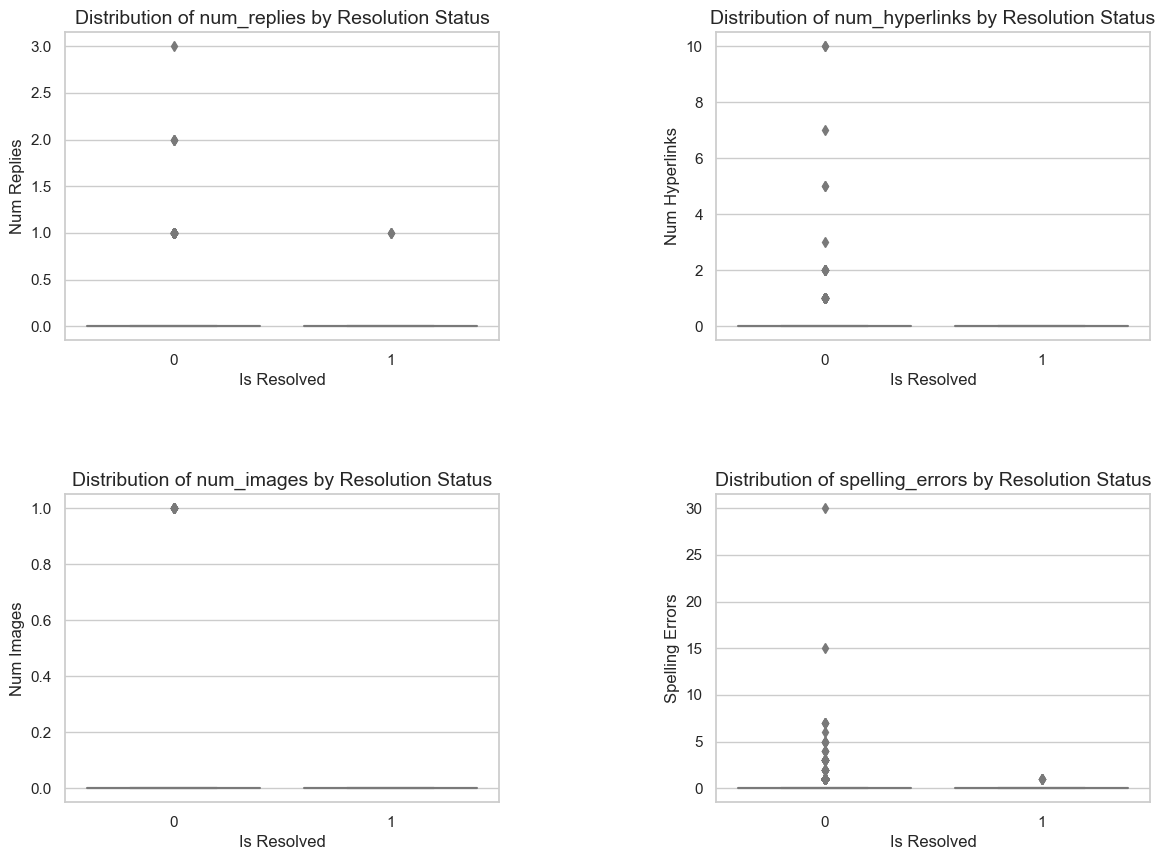

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization environment
sns.set(style="whitegrid")

# Creating a list of numerical predictors for iteration
numerical_predictors = ['num_replies', 'num_hyperlinks', 'num_images', 'spelling_errors']

# Setting up the figure for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()  # Flatten the array for easy iteration

for i, col in enumerate(numerical_predictors):
    sns.boxplot(x='is_resolved', y=col, data=dfcomments, ax=axes[i], palette="vlag")
    axes[i].set_title(f'Distribution of {col} by Resolution Status', fontsize=14)
    axes[i].set_xlabel('Is Resolved', fontsize=12)
    axes[i].set_ylabel(col.replace('_', ' ').title(), fontsize=12)

plt.show()


In [50]:
from scipy.stats import mannwhitneyu

# Function to perform Mann-Whitney U test
def perform_mannwhitneyu_test(data, group_col, value_col):
    group1 = data[data[group_col] == 0][value_col]
    group2 = data[data[group_col] == 1][value_col]

    # Performing the Mann-Whitney U test
    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

    return p_value

# Performing the test for each numerical predictor
p_values = {col: perform_mannwhitneyu_test(dfcomments, 'is_resolved', col) for col in numerical_predictors}

p_values


{'num_replies': 0.0002925601121438153,
 'num_hyperlinks': 0.47993314228484363,
 'num_images': 0.6989751539381263,
 'spelling_errors': 0.00021333334727224648}

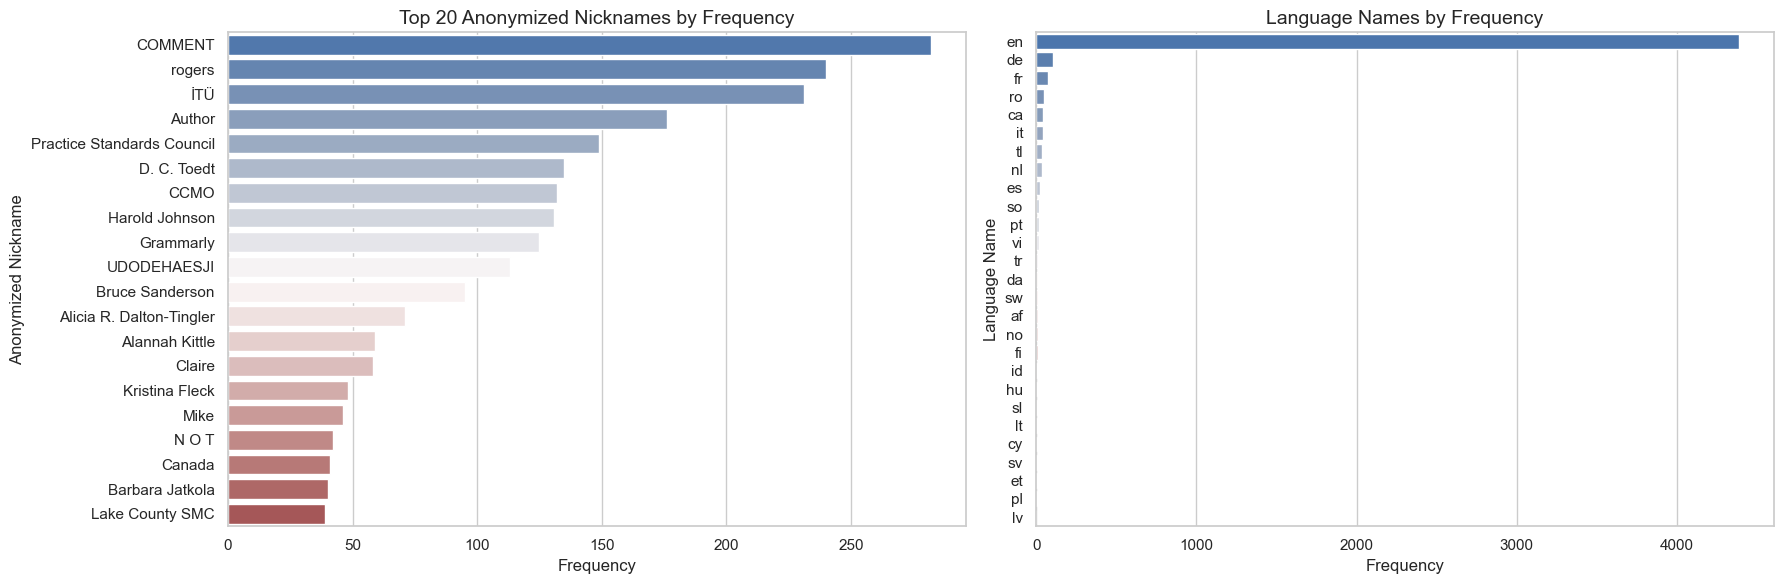

In [51]:
# Re-import necessary libraries and reload dataset due to code execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
dataset_path = 'labeled_comments_cleaned.csv'
df = pd.read_csv(dataset_path)

# Calculating the frequency of categories for each predictor
nickname_freq = df['anonymized_nickname'].value_counts().head(20)  # Limiting to top 20 for readability
language_freq = df['language_name'].value_counts()

# Setting up the figure for plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plotting 'anonymized_nickname' frequencies
sns.barplot(x=nickname_freq.values, y=nickname_freq.index, ax=axes[0], palette="vlag")
axes[0].set_title('Top 20 Anonymized Nicknames by Frequency', fontsize=14)
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_ylabel('Anonymized Nickname', fontsize=12)

# Plotting 'language_name' frequencies
sns.barplot(x=language_freq.values, y=language_freq.index, ax=axes[1], palette="vlag")
axes[1].set_title('Language Names by Frequency', fontsize=14)
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_ylabel('Language Name', fontsize=12)

plt.tight_layout()
plt.show()


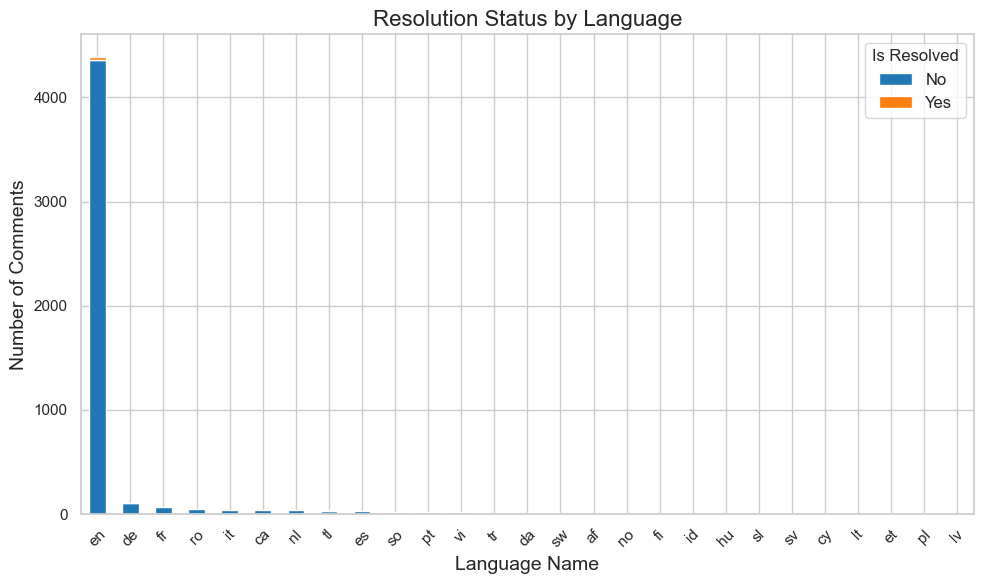

In [52]:
# Preparing data for stacked bar chart visualization for 'language_name'
language_resolution_df = df.groupby(['language_name', 'is_resolved']).size().unstack(fill_value=0)

# Adding a total column to sort languages by total number of comments
language_resolution_df['total'] = language_resolution_df.sum(axis=1)
language_resolution_df = language_resolution_df.sort_values(by='total', ascending=False).drop(columns='total')

# Creating the stacked bar chart
language_resolution_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Resolution Status by Language', fontsize=16)
plt.xlabel('Language Name', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Is Resolved', labels=['No', 'Yes'], fontsize=12)
plt.tight_layout()

plt.show()


In [53]:
from scipy.stats import chi2_contingency

# Preparing the contingency table for 'language_name' and 'is_resolved'
contingency_table = pd.crosstab(df['language_name'], df['is_resolved'])

# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2_result = {
    'chi2_statistic': chi2,
    'p_value': p,
    'degrees_of_freedom': dof
}

chi2_result


{'chi2_statistic': 63.35701202770693,
 'p_value': 5.8375589590895504e-05,
 'degrees_of_freedom': 26}

In [54]:
# Convert 'comment_date' to datetime format
df['comment_date'] = pd.to_datetime(df['comment_date'], errors='coerce', utc=True)

# Extract year and month for aggregation
df['year'] = df['comment_date'].dt.year
df['month'] = df['comment_date'].dt.month
df['year_month'] = df['comment_date'].dt.to_period('M')

# Checking the first few rows to ensure correct extraction
df[['comment_date', 'year', 'month', 'year_month']].head()


C:\Users\srava\AppData\Local\Temp\ipykernel_14392\4161152947.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['comment_date'] = pd.to_datetime(df['comment_date'], errors='coerce', utc=True)
C:\Users\srava\AppData\Local\Temp\ipykernel_14392\4161152947.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['comment_date'].dt.to_period('M')


comment_date  year  month year_month
0 2013-04-09 00:00:00+00:00  2013      4    2013-04
1 2011-12-08 00:00:00+00:00  2011     12    2011-12
2 2011-12-08 00:00:00+00:00  2011     12    2011-12
3 2011-12-08 00:00:00+00:00  2011     12    2011-12
4 2016-03-09 00:00:00+00:00  2016      3    2016-03

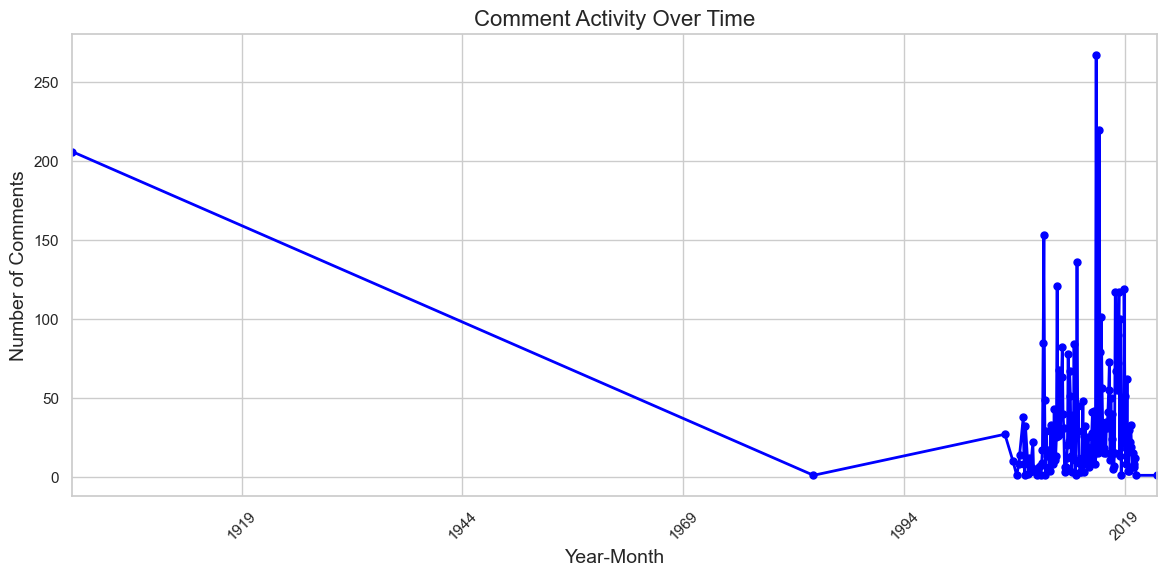

In [55]:
# Aggregating total number of comments per month
comments_per_month = df.groupby('year_month').size()

# Plotting the total number of comments over time
plt.figure(figsize=(14, 6))
comments_per_month.plot(kind='line', color='blue', marker='o', linewidth=2, markersize=5)
plt.title('Comment Activity Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


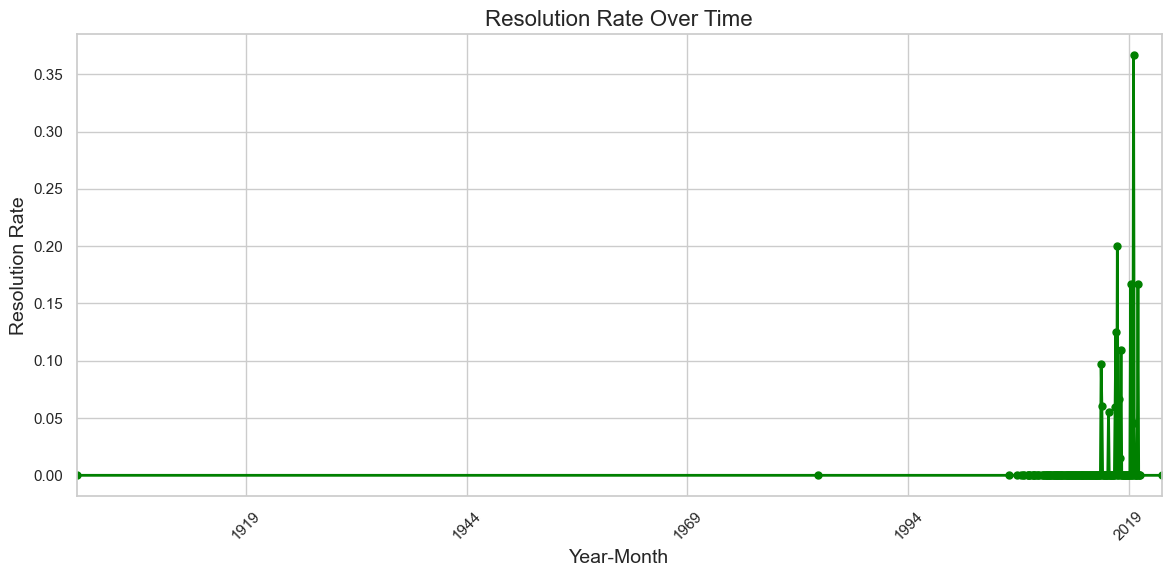

In [56]:
# Calculating resolution rates per month
resolution_rate_per_month = df.groupby('year_month')['is_resolved'].mean()

# Plotting resolution rates over time
plt.figure(figsize=(14, 6))
resolution_rate_per_month.plot(kind='line', color='green', marker='o', linewidth=2, markersize=5)
plt.title('Resolution Rate Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Resolution Rate', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [57]:
# Re-import necessary libraries, reload dataset, and re-define functions due to code execution state reset
import pandas as pd
from textblob import TextBlob

# Reload the dataset
dataset_path = 'labeled_comments_cleaned.csv'
df = pd.read_csv(dataset_path)

# Function to calculate sentiment polarity and subjectivity
def calculate_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Applying the function to the 'comment_full_text' column
df['sentiment_polarity'], df['sentiment_subjectivity'] = zip(*df['comment_full_text'].apply(calculate_sentiment))

# Previewing the DataFrame with the new sentiment columns
df[['comment_full_text', 'sentiment_polarity', 'sentiment_subjectivity']].head()


comment_full_text  sentiment_polarity  \
0                                                Ok?                0.50   
1  This has been discussed in the Executive Summa...                0.25   
2  This has been discussed in the Executive Summa...                0.25   
3  This has been discussed in the Executive Summa...                0.25   
4    CODING\n\nCode qualitative data for WAVGUAGE03A                0.00   

   sentiment_subjectivity  
0                  0.5000  
1                  0.5125  
2                  0.5125  
3                  0.5125  
4                  0.0000

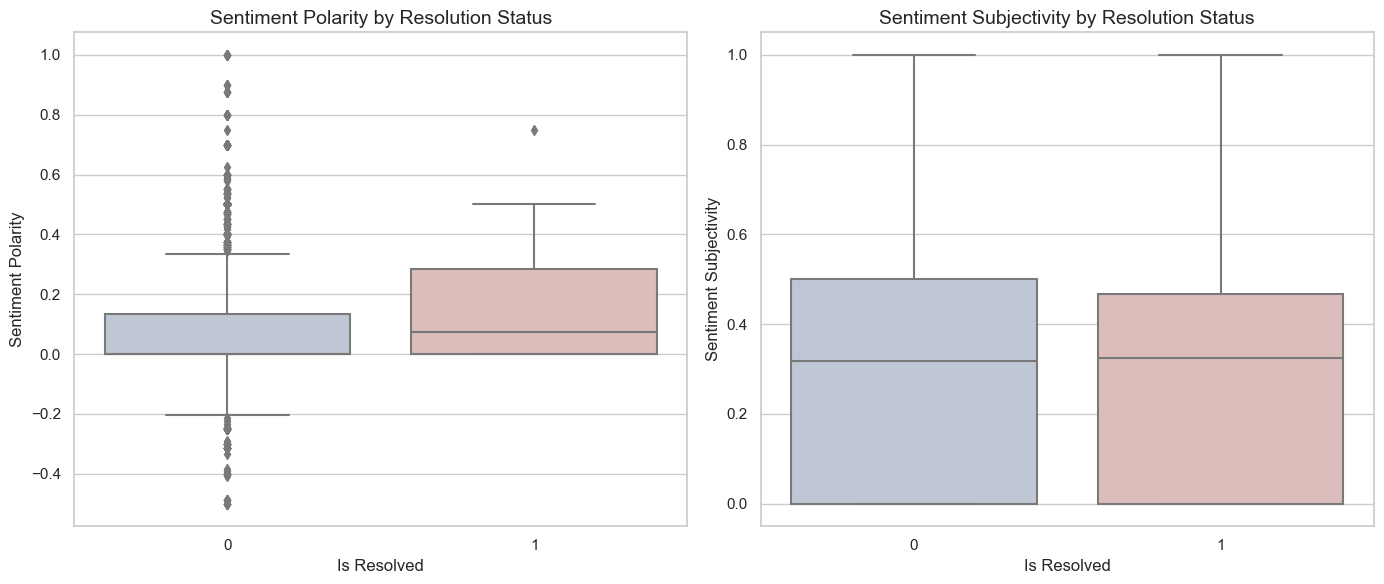

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization environment
sns.set(style="whitegrid")

# Creating boxplots to compare sentiment polarity and subjectivity between resolved and unresolved comments
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sentiment Polarity Comparison
sns.boxplot(x="is_resolved", y="sentiment_polarity", data=df, ax=axes[0], palette="vlag")
axes[0].set_title("Sentiment Polarity by Resolution Status", fontsize=14)
axes[0].set_xlabel("Is Resolved", fontsize=12)
axes[0].set_ylabel("Sentiment Polarity", fontsize=12)

# Sentiment Subjectivity Comparison
sns.boxplot(x="is_resolved", y="sentiment_subjectivity", data=df, ax=axes[1], palette="vlag")
axes[1].set_title("Sentiment Subjectivity by Resolution Status", fontsize=14)
axes[1].set_xlabel("Is Resolved", fontsize=12)
axes[1].set_ylabel("Sentiment Subjectivity", fontsize=12)

plt.tight_layout()
plt.show()


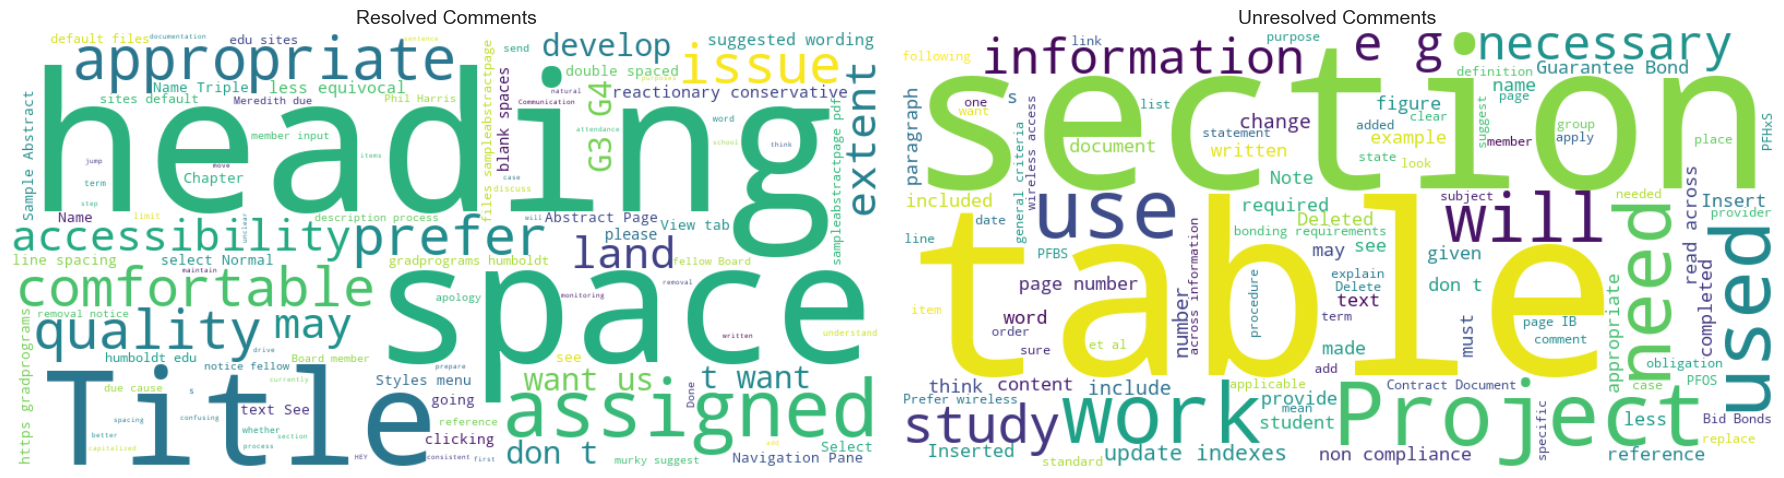

In [59]:
from wordcloud import WordCloud

# Generating word clouds for resolved and unresolved comments
resolved_comments_text = " ".join(df.loc[df['is_resolved'] == 1, 'comment_full_text'].astype(str))
unresolved_comments_text = " ".join(df.loc[df['is_resolved'] == 0, 'comment_full_text'].astype(str))

# Resolved comments word cloud
resolved_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(resolved_comments_text)

# Unresolved comments word cloud
unresolved_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(unresolved_comments_text)

# Plotting the word clouds
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

axes[0].imshow(resolved_wordcloud, interpolation='bilinear')
axes[0].set_title('Resolved Comments', fontsize=14)
axes[0].axis('off')

axes[1].imshow(unresolved_wordcloud, interpolation='bilinear')
axes[1].set_title('Unresolved Comments', fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()
